State Farm Distracted Drivers
=============

Prev Exercises: Udacity:DeepLearning:TensorFlow:notMNIST  

Fit Logistic Regression (sklearn)
------------


In [2]:
import sys
print sys.version

from joblib import Parallel, delayed  
import multiprocessing
nCores = multiprocessing.cpu_count() - 2 # Allow other apps to run
print 'nCores: %d' % (nCores)

from datetime import datetime, time
print 'now: %s' % str(datetime.now())

2.7.11 (default, Jan 28 2016, 14:07:46) 
[GCC 4.2.1 Compatible Apple LLVM 7.0.2 (clang-700.1.81)]
nCores: 14
now: 2016-05-14 10:19:54.710919


In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, Image
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects.lib import grid
from rpy2.robjects.lib import ggplot2
import rpy2.robjects.pandas2ri

import numpy as np
import os
import pandas as pd
from scipy import ndimage
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle
from sklearn.linear_model import LogisticRegression
import tarfile

%run img_utils.py

/usr/local/lib/python2.7/site-packages/rpy2/robjects/lib/ggplot2.py:59: UserWarning: This was designed againt ggplot2 version 2.0.0 but you have 2.1.0
  warnings.warn('This was designed againt ggplot2 version %s but you have %s' % (TARGET_VERSION, ggplot2.__version__))


## Analytics Specs

#### This Project

The specs should be in img_glbSpecs_SFDD

In [4]:
%run img_glbSpec_SFDD_ImgSz_64.py

imported img_glbSpec_SFDD_Img_Sz_64.py


In [5]:
#print 'glbDataFile: %s' % (glbDataFile)

print 'glbImg: %s' % (glbImg)

print 'glbRspClass: %s' % (glbRspClass)
print 'glbRspClassN: %d' % (glbRspClassN)

print 'glbPickleFile: %s' % (glbPickleFile)

glbImg: {'color': False, 'crop': {'x': (80, 560)}, 'shape': (480, 640, 3), 'pxlDepth': 255.0, 'center_scale': True, 'size': 64}
glbRspClass: ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
glbRspClassN: 10
glbPickleFile: {'models': 'data/img_M_SFDD_ImgSz_64.pickle', 'data': 'data/img_D_SFDD_ImgSz_64.pickle'}


#### notMNIST

In [6]:
# glbDataURL = 'http://yaroslavvb.com/upload/notMNIST/'
# glbImg['size'] = 14

## Import Data

In [6]:
# %run img_glbSpec_SFDD_ImgSz_64.py
# %run img_utils.py
glbObsFitIdn, glbObsFitFtr, glbObsFitRsp, \
glbObsVldIdn, glbObsVldFtr, glbObsVldRsp, \
glbObsNewIdn, glbObsNewFtr, glbObsNewRsp, \
_, _ = myimportDbs(glbPickleFile['data'])

print('Fit set:', len(glbObsFitIdn), glbObsFitFtr.shape, glbObsFitRsp.shape)
print('Vld set:', len(glbObsVldIdn), glbObsVldFtr.shape, glbObsVldRsp.shape)
# print('Trn set:', len(glbObsTrnIdn), glbObsTrnFtr.shape, glbObsTrnRsp.shape)    
print('New set:', len(glbObsNewIdn), glbObsNewFtr.shape, glbObsNewRsp.shape)

Importing database from data/img_D_SFDD_ImgSz_64.pickle...
('Fit set:', 18077, (18077, 64, 64), (18077,))
('Vld set:', 4347, (4347, 64, 64), (4347,))
('New set:', 79726, (79726, 64, 64), (79726,))


In [22]:
# print globals().keys().index('glbObsFitIdn')

In [79]:
# with open(glbPickleFile['data'], 'rb') as f:
#   save = pickle.load(f)

#   glbObsFitIdn = save['glbObsFitIdn']
#   glbObsFitFtr = save['glbObsFitFtr']
#   glbObsFitRsp = save['glbObsFitRsp']

#   glbObsVldIdn = save['glbObsVldIdn']
#   glbObsVldFtr = save['glbObsVldFtr']
#   glbObsVldRsp = save['glbObsVldRsp']

#   glbObsTrnIdn = save['glbObsTrnIdn']
#   glbObsTrnFtr = save['glbObsTrnFtr']
#   glbObsTrnRsp = save['glbObsTrnRsp']

#   glbObsNewIdn = save['glbObsNewIdn']
#   glbObsNewFtr = save['glbObsNewFtr']
#   glbObsNewRsp = save['glbObsNewRsp']

#   del save  # hint to help gc free up memory
    
#   print('Fit set:', len(glbObsFitIdn), glbObsFitFtr.shape, glbObsFitRsp.shape)
#   print('Vld set:', len(glbObsVldIdn), glbObsVldFtr.shape, glbObsVldRsp.shape)
#   print('Trn set:', len(glbObsTrnIdn), glbObsTrnFtr.shape, glbObsTrnRsp.shape)    
#   print('New set:', len(glbObsNewIdn), glbObsNewFtr.shape, glbObsNewRsp.shape)

('Fit set:', 17940, (17940, 32, 32), (17940,))
('Vld set:', 4484, (4484, 32, 32), (4484,))
('Trn set:', 22424, (22424, 32, 32), (22424,))
('New set:', 79726, (79726, 32, 32), (79726,))


---
Fit Logistic Regression (sklearn) as a baseline
---------

Let's get an idea of what an off-the-shelf classifier can give you on this data. It's always good to check that there is something to learn, and that it's a problem that is not so trivial that a canned solution solves it.

Train a simple model on this data using 50, 100, 1000 and 5000 training samples. Hint: you can use the LogisticRegression model from sklearn.linear_model.

Optional question: train an off-the-shelf model on all the data!

---

In [20]:

# print glbObsTrnFtr[0:3,:,:]
# print np.reshape(glbObsTrnFtr[0:3,:,:], (3, glbObsTrnFtr.shape[1] * glbObsTrnFtr.shape[2]))
# print np.reshape(glbObsTrnFtr[0:3,:,:], (3, glbObsTrnFtr.shape[1] * glbObsTrnFtr.shape[2])).shape


In [26]:
# from sklearn import metrics, linear_model
# import pandas as pd
# from datetime import datetime, time

In [7]:
print (glbObsNewRsp > -1).any()

False


In [8]:
glbObsFitFtrRsh = np.reshape(glbObsFitFtr, 
    (glbObsFitFtr.shape[0], glbObsFitFtr.shape[1] * glbObsFitFtr.shape[2]))
glbObsVldFtrRsh = np.reshape(glbObsVldFtr, 
    (glbObsVldFtr.shape[0], glbObsVldFtr.shape[1] * glbObsVldFtr.shape[2]))
glbObsNewFtrRsh = np.reshape(glbObsNewFtr, 
    (glbObsNewFtr.shape[0], glbObsNewFtr.shape[1] * glbObsNewFtr.shape[2]))

print('Fit Ftr Reshaped:', glbObsFitFtrRsh.shape)
print('Vld Ftr Reshaped:', glbObsVldFtrRsh.shape)
print('New Ftr Reshaped:', glbObsNewFtrRsh.shape)

('Fit Ftr Reshaped:', (18077, 4096))
('Vld Ftr Reshaped:', (4347, 4096))
('New Ftr Reshaped:', (79726, 4096))


In [114]:
print type(glbObsFitRsp)
print glbObsFitRsp.shape
print glbObsVldRsp.shape

<type 'numpy.ndarray'>
(18077,)
(4347,)


In [115]:
glbObsTrnIdn = glbObsFitIdn + glbObsVldIdn
glbObsTrnFtr = np.vstack((glbObsFitFtr, glbObsVldFtr))
glbObsTrnRsp = np.concatenate((glbObsFitRsp, glbObsVldRsp))
print('Trn set:', len(glbObsTrnIdn), glbObsTrnFtr.shape, glbObsTrnRsp.shape)

glbObsTrnFtrRsh = np.reshape(glbObsTrnFtr, 
    (glbObsTrnFtr.shape[0], glbObsTrnFtr.shape[1] * glbObsTrnFtr.shape[2]))
print('Trn Ftr Reshaped:', glbObsTrnFtrRsh.shape)

('Trn set:', 22424, (22424, 64, 64), (22424,))
('Trn Ftr Reshaped:', (22424, 4096))


In [19]:
print type(glbObsVldRsp)
print glbObsVldRsp.shape
print type(glbObsVldRsp[0:1])

<type 'numpy.ndarray'>
(4347,)
<type 'numpy.ndarray'>


In [33]:
# def fitMdl(nObsFit = 50):
#     mdl = linear_model.LogisticRegression(verbose = 1)
#     mdl.fit(np.reshape(glbObsTrnFtr[0:nObsFit,:,:], \
#                             (nObsFit, glbObsTrnFtr.shape[1] * glbObsTrnFtr.shape[2])), \
#                  glbObsTrnRsp[0:nObsFit])
#     print mdl.get_params()
#     print mdl.coef_.shape
#     print '  coeff stats:'
#     for lblIx in xrange(len(dspLabels)):
#         print '  label:%s; minCoeff:row:%2d, col:%2d, value:%0.4f; maxCoeff:row:%2d, col:%2d, value:%0.4f;' % \
#             (dspLabels[lblIx], \
#              mdl.coef_[lblIx,:].argmin() / glbImgSz, \
#              mdl.coef_[lblIx,:].argmin() % glbImgSz, \
#              mdl.coef_[lblIx,:].min(), \
#              mdl.coef_[lblIx,:].argmax() / glbImgSz, \
#              mdl.coef_[lblIx,:].argmax() % glbImgSz, \
#              mdl.coef_[lblIx,:].max())

#     lclObsFitRspPred = mdl.predict(np.reshape(glbObsTrnFtr[0:nObsFit,:,:], \
#                                                     (nObsFit               , glbImgSz ** 2)))
#     accFit = metrics.accuracy_score(lclObsFitRspPred, glbObsTrnRsp[0:nObsFit])
#     print '  accuracy train:%0.4f' % (accFit)
#     print metrics.confusion_matrix(glbObsTrnRsp[0:nObsFit], lclObsFitRspPred)

#     valid_pred_labels = mdl.predict(np.reshape(glbObsVldFtr, \
#                                                     (glbObsVldFtr.shape[0], glbImgSz ** 2)))
#     accuracy_valid = metrics.accuracy_score(valid_pred_labels, glbObsVldRsp)
#     print '  accuracy valid:%0.4f' % (accuracy_valid)
#     print metrics.confusion_matrix(glbObsVldRsp           , valid_pred_labels)

#     test_pred_labels  = mdl.predict(np.reshape(glbObsNewFtr, \
#                                                     (glbObsNewFtr.shape[0], glbImgSz ** 2)))
#     accuracy_test = metrics.accuracy_score( test_pred_labels,  glbObsNewRsp)
#     print '  accuracy  test:%0.4f' % (accuracy_test)
#     test_conf = pd.DataFrame(metrics.confusion_matrix( glbObsNewRsp,  test_pred_labels), \
#                              index = dspLabels, columns = dspLabels)
#     print test_conf
    
#     return(mdl, (accFit, accuracy_valid, accuracy_test))

In [81]:
# try:
#     glbMdlDf = pd.read_pickle(glbPickleFile['models'])
# except IOError, e:
#     print(e)    
#     if e.errno == 2:    
#         glbMdlDf = pd.DataFrame()
#     else:
#         raise
# print(glbMdlDf)

[Errno 2] No such file or directory: 'data/img_M_SFDD_ImgSz_32.pickle'
Empty DataFrame
Columns: []
Index: []



Logistic Regression (sklearn): nObsFit:   100; 
[LibLinear]
  Fit accuracy:1.0000
  Fit  logLoss:0.0808

  Vld accuracy:0.3071
  Vld  logLoss:2.4979
[[194  18  30  63  69   4  62   3   0  41]
 [  0 187  57  27  83  25  10  70  18   1]
 [  5  13 312  16  28  44  17  16   1   0]
 [ 30   6   5 353  20   6  14   2   5   2]
 [ 29   1  19 215  53  48  81   0  13   0]
 [  8   1  86  40  12  78  61   0 134   2]
 [  0  59 197  32  27  53  74   0   1   0]
 [  2   4 111  25  71   1  68  65   3   0]
 [  4  30 179  36  37  12  30  18  18   0]
 [ 35   1  14 111  10  63  69  12 136   1]]


Max Proba for cls: c0; desc: normal driving; proba: 0.8957; nObs: 1
  img_93047.jpg:


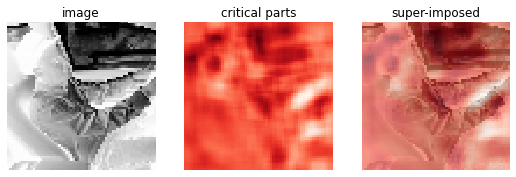

  Proba:
[ 0.8957  0.0291  0.0168  0.0105  0.0071  0.0006  0.0016  0.0022  0.007
  0.0295]
Min Proba for cls: c0; desc: normal driving; proba: 0.1699; nObs: 1
  img_67947.jpg:


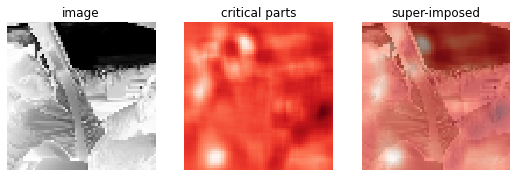

  Proba:
[ 0.1699  0.1038  0.1185  0.1659  0.0522  0.1321  0.0829  0.1625  0.0008
  0.0113]
  next best class: texting - left


Max Proba for cls: c1; desc: texting - right; proba: 0.8630; nObs: 1
  img_100664.jpg:


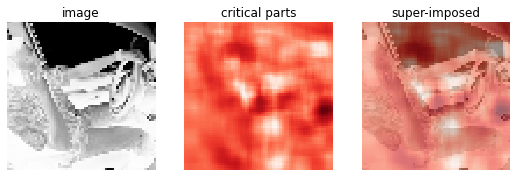

  Proba:
[ 0.0073  0.863   0.0103  0.0122  0.083   0.0011  0.0022  0.0108  0.0062
  0.004 ]
Min Proba for cls: c1; desc: texting - right; proba: 0.2215; nObs: 1
  img_80730.jpg:


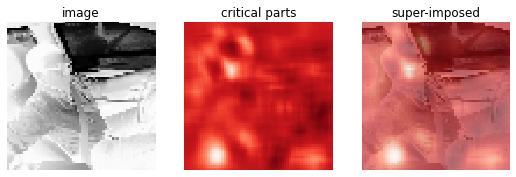

  Proba:
[ 0.0112  0.2215  0.1713  0.1887  0.1495  0.0053  0.0165  0.0335  0.0909
  0.1117]
  next best class: texting - left


Max Proba for cls: c2; desc: talking on the phone - right; proba: 0.8995; nObs: 1
  img_69355.jpg:


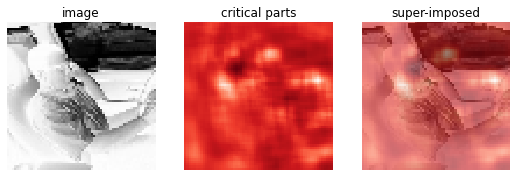

  Proba:
[ 0.0045  0.0175  0.8995  0.0019  0.0322  0.0055  0.0057  0.0087  0.0166
  0.0079]
Min Proba for cls: c2; desc: talking on the phone - right; proba: 0.1915; nObs: 1
  img_54197.jpg:


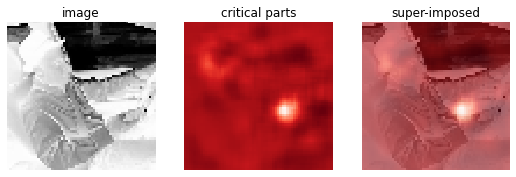

  Proba:
[ 0.1548  0.1517  0.1915  0.0441  0.1669  0.162   0.0189  0.0134  0.076
  0.0207]
  next best class: talking on the phone - left


Max Proba for cls: c3; desc: texting - left; proba: 0.9380; nObs: 1
  img_16658.jpg:


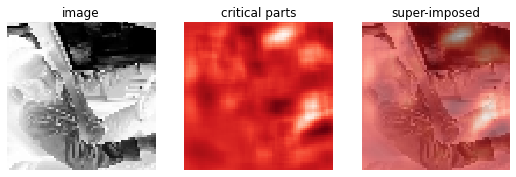

  Proba:
[ 0.0022  0.0042  0.0104  0.938   0.0025  0.0056  0.0039  0.0012  0.0006
  0.0313]
Min Proba for cls: c3; desc: texting - left; proba: 0.1946; nObs: 1
  img_100828.jpg:


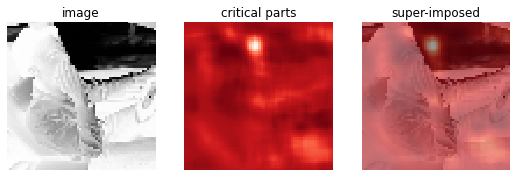

  Proba:
[ 0.0635  0.0538  0.1359  0.1946  0.0541  0.1481  0.1848  0.1386  0.0004
  0.0261]
  next best class: drinking


Max Proba for cls: c4; desc: talking on the phone - left; proba: 0.8133; nObs: 1
  img_87176.jpg:


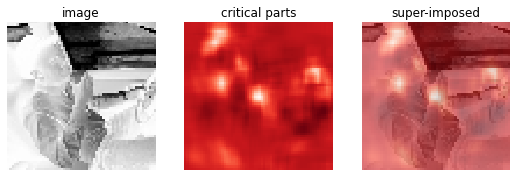

  Proba:
[ 0.0303  0.0282  0.0273  0.0092  0.8133  0.0456  0.0017  0.0161  0.0036
  0.0246]
Min Proba for cls: c4; desc: talking on the phone - left; proba: 0.1818; nObs: 1
  img_41172.jpg:


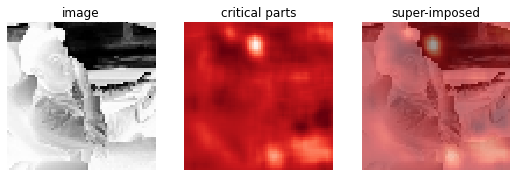

  Proba:
[ 0.1449  0.1423  0.1772  0.0643  0.1818  0.1129  0.0046  0.0089  0.1395
  0.0237]
  next best class: talking on the phone - right


Max Proba for cls: c5; desc: operating the radio; proba: 0.8742; nObs: 1
  img_69998.jpg:


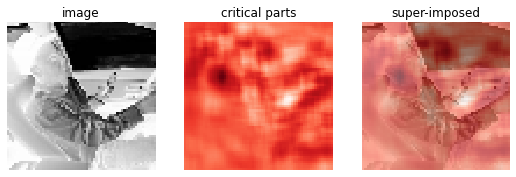

  Proba:
[ 0.0037  0.0124  0.0553  0.0209  0.014   0.8742  0.0029  0.0104  0.0028
  0.0033]
Min Proba for cls: c5; desc: operating the radio; proba: 0.1834; nObs: 1
  img_66494.jpg:


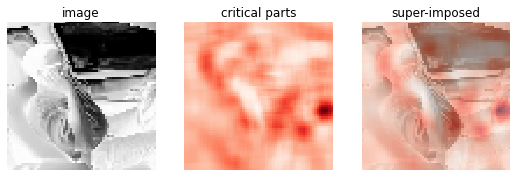

  Proba:
[ 0.1642  0.1629  0.1821  0.0384  0.1704  0.1834  0.0216  0.01    0.0459
  0.021 ]
  next best class: talking on the phone - right


Max Proba for cls: c6; desc: drinking; proba: 0.9462; nObs: 1
  img_60437.jpg:


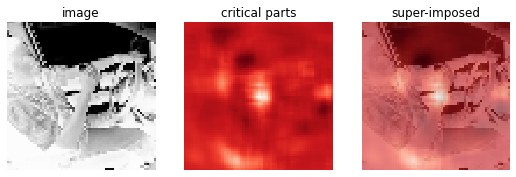

  Proba:
[ 0.0057  0.0065  0.022   0.0005  0.0024  0.0086  0.9462  0.0054  0.0007
  0.0021]
Min Proba for cls: c6; desc: drinking; proba: 0.1778; nObs: 1
  img_79278.jpg:


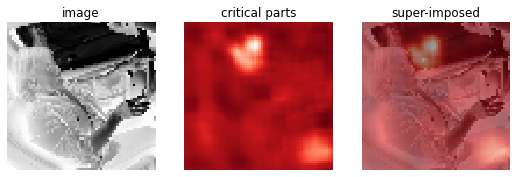

  Proba:
[ 0.1608  0.1636  0.0612  0.106   0.026   0.1731  0.1778  0.1123  0.0004
  0.0188]
  next best class: operating the radio


Max Proba for cls: c7; desc: reaching behind; proba: 0.7456; nObs: 1
  img_33671.jpg:


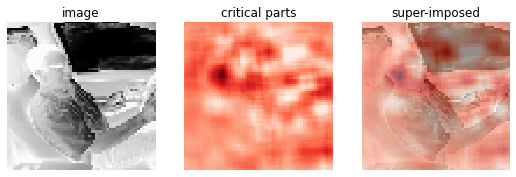

  Proba:
[ 0.0065  0.0129  0.0549  0.0095  0.0168  0.1013  0.042   0.7456  0.0001
  0.0102]
Min Proba for cls: c7; desc: reaching behind; proba: 0.2039; nObs: 1
  img_52526.jpg:


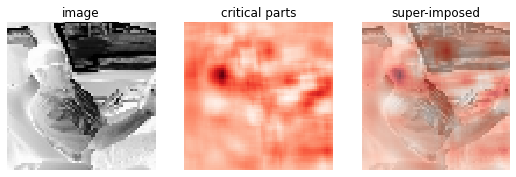

  Proba:
[ 0.0842  0.1082  0.1157  0.1872  0.046   0.1728  0.0649  0.2039  0.0004
  0.0167]
  next best class: texting - left


Max Proba for cls: c8; desc: hair and makeup; proba: 0.8235; nObs: 1
  img_94974.jpg:


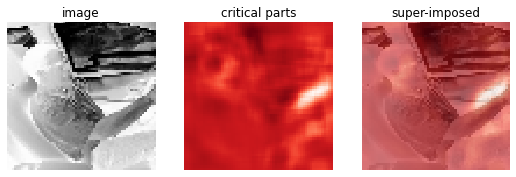

  Proba:
[ 0.0361  0.0025  0.0716  0.0034  0.0274  0.0013  0.0017  0.0103  0.8235
  0.0222]
Min Proba for cls: c8; desc: hair and makeup; proba: 0.2190; nObs: 1
  img_33923.jpg:


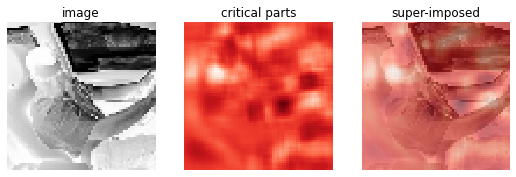

  Proba:
[ 0.1792  0.1032  0.1134  0.0508  0.0833  0.1916  0.0109  0.0133  0.219
  0.0351]
  next best class: operating the radio


Max Proba for cls: c9; desc: talking to passenger; proba: 0.5132; nObs: 1
  img_64975.jpg:


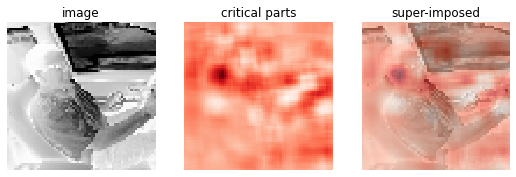

  Proba:
[ 0.1929  0.0047  0.0614  0.0934  0.1281  0.0011  0.0007  0.0011  0.0034
  0.5132]
Min Proba for cls: c9; desc: talking to passenger; proba: 0.1925; nObs: 1
  img_94230.jpg:


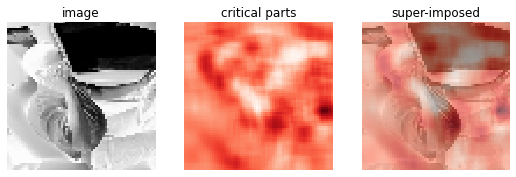

  Proba:
[ 0.0763  0.1383  0.1651  0.0926  0.1639  0.0048  0.0058  0.0367  0.124
  0.1925]
  next best class: talking on the phone - right

  New prediction knts:
{'clsKnt': (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32), array([ 8703,  4615, 10963,  8040,  5310, 10131,  9263,  6863, 13613,  2225]))}
  duration: 29 seconds

Logistic Regression (sklearn): nObsFit:   100; 
  duration: 07 seconds

mdlDf: 
           id  nObsFit                                              model  \
0  LgtRgr.skl      100  LogisticRegression(C=1.0, class_weight=None, d...   
0  LgtRgr.skl      100  LogisticRegression(C=1.0, class_weight=None, d...   

     accVld  logLossVld                                            predNew  \
0  0.307108     2.49794  {u'clsKnt': ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [...   
0  0.307108     2.49794  {u'clsKnt': ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [...   

   duration  
0        29  
0         7  


In [26]:
# %run img_glbSpec_SFDD_ImgSz_64.py
%run img_utils.py
# import img_utils
def fitMdlLgtRgrSkl(lclObsFitFtrRsh, lclObsFitRsp, nObsFit = 50, 
                    verbose = False):
    
    from sklearn import metrics as skl_metrics
    from sklearn.linear_model \
        import LogisticRegression as skl_LogisticRegression
   
    print('\nLogistic Regression (sklearn): nObsFit: %5d; ' % ( \
            nObsFit))
    
    startTm = datetime.now()

    mdlDf = pd.DataFrame({'id': 'LgtRgr.skl',
                            'nObsFit': [nObsFit]
                         })
    
    mdl = skl_LogisticRegression(verbose = verbose)
    
    mdl.fit(lclObsFitFtrRsh[:nObsFit], lclObsFitRsp[:nObsFit])
    
    mdlDf['model'] = mdl
    
    lclObsFitRspPred = mdl.predict(lclObsFitFtrRsh[:nObsFit])
    lclObsFitRspPredProba = mdl.predict_proba(lclObsFitFtrRsh[:nObsFit])
    accFit = skl_metrics.accuracy_score(lclObsFitRspPred, 
                                    lclObsFitRsp[:nObsFit])
    logLossFit = skl_metrics.log_loss(lclObsFitRsp[:nObsFit], 
                                  lclObsFitRspPredProba)
    if verbose:
        print '\n  Fit accuracy:%0.4f' % (accFit)
        print   '  Fit  logLoss:%0.4f' % (logLossFit)        
#         print metrics.confusion_matrix(glbObsFitRsp[0:nObsFit], 
#                                         lclObsFitRspPred)

    lclObsVldRspPred = mdl.predict(glbObsVldFtrRsh)
    lclObsVldRspPredProba = mdl.predict_proba(glbObsVldFtrRsh)
    mdlDf['accVld'] = accVld = skl_metrics.accuracy_score(lclObsVldRspPred, 
                                                      glbObsVldRsp)
    mdlDf['logLossVld'] = logLossVld = skl_metrics.log_loss(glbObsVldRsp, 
                                                lclObsVldRspPredProba)    
    if verbose:
        print '\n  Vld accuracy:%0.4f' % (accVld)
        print   '  Vld  logLoss:%0.4f' % (logLossVld)        
        print skl_metrics.confusion_matrix(glbObsVldRsp, lclObsVldRspPred)
        yLbl = [glbRspClassDesc[glbRspClass[ix]] + ':' + 
                  glbRspClass[ix] + ':actl' for ix in xrange(glbRspClassN)]
        xLbl = ['pred:' + glbRspClass[ix] + ':' + glbRspClassDesc[glbRspClass[ix]]
                   for ix in xrange(glbRspClassN)]
        # print labels
        plt.matshow(skl_metrics.confusion_matrix(glbObsVldRsp, 
                                                 lclObsVldRspPred), cmap='Reds', 
                    interpolation='none')
        plt.yticks(np.arange(10), yLbl)
        plt.xticks(np.arange(10), xLbl, rotation=90);

#         print 'glbRspClass: %s' % (glbRspClass)
        mydisplayImagePredictions(mdl,
            glbObsVldIdn, glbObsVldFtr, glbObsVldRsp, lclObsVldRspPredProba, 
            glbRspClass, glbRspClassDesc)
            
#         nSmpImgs = 5
#         plot_occlusion(mdl, np.reshape(glbObsVldFtr[:nSmpImgs], 
#             (nSmpImgs, 1, glbObsVldFtr.shape[1], glbObsVldFtr.shape[2])), 
#                        glbObsVldRsp[:nSmpImgs])
#         plt.show()

    lclObsNewRspPred = mdl.predict(glbObsNewFtrRsh)
    lclObsNewRspPredProba = mdl.predict_proba(glbObsNewFtrRsh)
    if (glbObsNewRsp > -1).any():
        mdlDf['accNew'] = accNew = skl_metrics.accuracy_score(lclObsNewRspPred, 
                                                          glbObsNewRsp)
        mdlDf['logLossNew'] = logLossNew = skl_metrics.log_loss(glbObsNewRsp, 
                                                    lclObsNewRspPredProba)        
        if verbose:
            print '\n  New accuracy:%0.4f' % (accNew)
            print   '  New  logLoss:%0.4f' % (logLossNew)            
            print skl_metrics.confusion_matrix(glbObsNewRsp, lclObsNewRspPred)
            print '\n  lclObsNewRspPredProba:'  
            print np.array_str(lclObsNewRspPredProba[:5, :], 
                                     precision=4, suppress_small=True)
    
    clsKntDct = {'clsKnt' : np.unique(lclObsNewRspPred, return_counts = True)}
    mdlDf['predNew'] = None
    mdlDf.set_value(0, 'predNew', clsKntDct)
    if verbose:
        print '\n  New prediction knts:'
        print mdlDf['predNew'][0]
    
#     print mdl.get_params()
#     print mdl.coef_.shape
#     print '  coeff stats:'
#     for lblIx in xrange(len(dspLabels)):
#         print '  label:%s; minCoeff:row:%2d, col:%2d, value:%0.4f; maxCoeff:row:%2d, col:%2d, value:%0.4f;' % \
#             (dspLabels[lblIx], \
#              mdl.coef_[lblIx,:].argmin() / glbImgSz, \
#              mdl.coef_[lblIx,:].argmin() % glbImgSz, \
#              mdl.coef_[lblIx,:].min(), \
#              mdl.coef_[lblIx,:].argmax() / glbImgSz, \
#              mdl.coef_[lblIx,:].argmax() % glbImgSz, \
#              mdl.coef_[lblIx,:].max())

    mdlDf['model'] = mdl
    mdlDf['duration'] = (datetime.now() - startTm).seconds  
    print('  duration: %.2d seconds' % (mdlDf['duration'][0]))  
    
    return(mdlDf, lclObsVldRspPredProba, lclObsNewRspPredProba)
    
mdlDf = pd.DataFrame()

thsDf, thsObsVldRspPredProba, thsObsNewRspPredProba = fitMdlLgtRgrSkl(
    glbObsFitFtrRsh, glbObsFitRsp, nObsFit = 100, verbose = True)
mdlDf = mdlDf.append(thsDf)
# To check if model results are deterministic
thsDf, thsObsVldRspPredProba, thsObsNewRspPredProba = fitMdlLgtRgrSkl(
    glbObsFitFtrRsh, glbObsFitRsp, nObsFit = 100)
mdlDf = mdlDf.append(thsDf)

print '\nmdlDf: '
print(mdlDf)

In [27]:
print glbPickleFile['models']

data/img_M_SFDD_ImgSz_64.pickle


In [30]:
glbMdlDf = None
# glbMdlDf = pd.DataFrame()

In [78]:
%run img_utils.py
srchParamsDct = {
    'nObsFit' : [100, 1000, 5000, 10000, 15000, glbObsFitFtr.shape[0]]
#     'nObsFit' = [100, 1000, 5000, 10000, glbObsFitFtr.shape[0]]    
                }

jnk = mysearchParams(fitMdlLgtRgrSkl, srchParamsDct = srchParamsDct, 
               curResultsDf = glbMdlDf, 
               mode = 'displayonly', 
                save_filepathname = glbPickleFile['models'],                     
              lclObsFitFtrRsh = glbObsFitFtrRsh, 
              lclObsFitRsp = glbObsFitRsp)

# thsDf, thsObsVldRspPredProba, thsObsNewRspPredProba = fitMdlLgtRgrSkl(
#     glbObsFitFtrRsh, glbObsFitRsp, nObsFit = 100)

# for nObsFit in nObsFitSearch:
#     if (glbMdlDf.shape[0] == 0) or \
#        (glbMdlDf[(glbMdlDf.nObsFit == nObsFit )].shape[0] == 0):
#         mdlDf = fitMdlLgtRgr(glbObsFitFtr, glbObsFitRsp, nObsFit = nObsFit, verbose = False)
#         glbMdlDf = glbMdlDf.append(mdlDf)        
#fitMdlLgtRgr(nObsFit, verbose = False)

mysearchParams: will run <function fitMdlLgtRgrSkl at 0x11554d848> with params:
         nObsFit
nObsFit         
100.0     5000.0
100.0    15000.0
Compressed pickle file: data/img_M_SFDD_ImgSz_64.pickle; size: 1604 KB


In [79]:
%run img_utils.py

glbMdlDf = mysearchParams(fitMdlLgtRgrSkl, srchParamsDct = srchParamsDct, 
               curResultsDf = glbMdlDf, 
               mode = 'run',
                sort_values    = ['nObsFit', 'duration'], 
                sort_ascending = [False    , True      ],                          
                save_filepathname = glbPickleFile['models'],                     
              lclObsFitFtrRsh = glbObsFitFtrRsh, 
              lclObsFitRsp = glbObsFitRsp)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:25: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:27: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


mysearchParams: running <function fitMdlLgtRgrSkl at 0x11554d848> with params:
nObsFit    5000.0
Name: 100.0, dtype: float64

Logistic Regression (sklearn): nObsFit:  5000; 
  duration: 150 seconds
mysearchParams: running <function fitMdlLgtRgrSkl at 0x11554d848> with params:
nObsFit    15000.0
Name: 100.0, dtype: float64

Logistic Regression (sklearn): nObsFit: 15000; 
  duration: 514 seconds
        bestFit    accVld                                            predNew  \
nObsFit                                                                        
18077.0    True  0.343685  {u'clsKnt': ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [...   
15000.0     NaN  0.342535  {u'clsKnt': ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [...   
10000.0   False  0.358638  {u'clsKnt': ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [...   
5000.0      NaN  0.363699  {u'clsKnt': ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [...   
2000.0    False  0.341385  {u'clsKnt': ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [...   
1000.0    False  0.333333  {u'clsKnt': ([0,

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [82]:
glbMdlDf['bestFit'] = False
glbMdlDf.ix[18077.0, 'bestFit'] = True
# glbMdlDf.ix[(18077.0, 79726.0, 346.0), 'bestFit'] = True
# 18077.0    
print glbMdlDf[list(set(glbMdlDf.columns) - set(srchParamsDct.keys()))]
# print glbMdlDf[tstGetCorrObsDf.yRowsN >= 70000]

        bestFit    accVld                                            predNew  \
nObsFit                                                                        
18077.0    True  0.343685  {u'clsKnt': ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [...   
15000.0   False  0.342535  {u'clsKnt': ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [...   
10000.0   False  0.358638  {u'clsKnt': ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [...   
5000.0    False  0.363699  {u'clsKnt': ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [...   
2000.0    False  0.341385  {u'clsKnt': ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [...   
1000.0    False  0.333333  {u'clsKnt': ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [...   
100.0     False  0.307108  {u'clsKnt': ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [...   

         logLossVld  duration  \
nObsFit                         
18077.0    3.116799       597   
15000.0    3.085191       514   
10000.0    2.885114       317   
5000.0     2.610439       150   
2000.0     2.498749        55   
1000.0     2.539650        28   
100.0      2.49

In [81]:
robjects.pandas2ri.activate()
pltRDf = robjects.conversion.py2ri(glbMdlDf)
# print(pltRDf)
pltRFn = robjects.r("""
    source('~/Dropbox/datascience/R/myplot.R')
    function(RDf, filename) {
        mypltModelStats(RDf, c('accVld', 'logLossVld', 'duration'), 
            dim = c('nObsFit'), 
                scaleXFn = NULL, 
                #highLightIx = which.min(RDf$logLossVld),
                highLightIx = which(RDf$bestFit == 'TRUE'),                
            title = NULL, 
            fileName = filename)
    }                        
""")    
pltRFn(pltRDf, 'img_02_fit_lgtRgrSkl_SFDD_glbMdlDf.png')

pltRFn = robjects.r("""
    source('~/Dropbox/datascience/R/myplot.R')
    function(RDf, filename) {
        mypltModelStats(RDf, c('accVld', 'logLossVld'), 
            dim = c('nObsFit'), 
                scaleXFn = NULL, 
                #highLightIx = which.min(RDf$logLossVld),
                highLightIx = which(RDf$bestFit == 'TRUE'),                
            title = NULL, 
            fileName = filename)
    }                        
""")    
pltRFn(pltRDf, 'img_02_fit_lgtRgrSkl_SFDD_glbMdlDf_logLossVld.png')

pltRFn = robjects.r("""
    source('~/Dropbox/datascience/R/myplot.R')
    function(RDf, filename) {
        mypltModelStats(RDf, c('accVld'), 
            dim = c('nObsFit'), 
                scaleXFn = NULL, 
                #highLightIx = which.min(RDf$logLossVld),
                highLightIx = which(RDf$bestFit == 'TRUE'),                
            title = NULL, 
            fileName = filename)
    }                        
""")    
pltRFn(pltRDf, 'img_02_fit_lgtRgrSkl_SFDD_glbMdlDf_accVld.png')

<ListVector - Python:0x11f0377e8 / R:0x7f9c2151ee00>
[DataF..., ListV..., Envir..., ..., ListV..., Envir..., ListV...]
<ListVector - Python:0x11f0377e8 / R:0x7f9c2151ee00>
[DataF..., ListV..., Envir..., ..., ListV..., Envir..., ListV...]
<ListVector - Python:0x11f0377e8 / R:0x7f9c2151ee00>
[DataF..., ListV..., Envir..., ..., ListV..., Envir..., ListV...]
  scales: <class 'rpy2.robjects.environments.Environment'>
  <Environment - Python:0x1160d8cf8 / R:0x7f9c1c555f08>
  ...
<ListVector - Python:0x11f0377e8 / R:0x7f9c2151ee00>
[DataF..., ListV..., Envir..., ..., ListV..., Envir..., ListV...]
  layers: <class 'rpy2.robjects.environments.Environment'>
  <Environment - Python:0x1160d8b00 / R:0x7f9c299a8d48>
<ListVector - Python:0x11f0377e8 / R:0x7f9c2151ee00>
[DataF..., ListV..., Envir..., ..., ListV..., Envir..., ListV...]

### Inspect model prediction quality

#### by class


Logistic Regression (sklearn): nObsFit: 18077; 
[LibLinear]
  Fit accuracy:1.0000
  Fit  logLoss:0.0170

  Vld accuracy:0.3437
  Vld  logLoss:3.1168
[[241  14  10   4  90   0  29  57  12  27]
 [ 25 164   8   0   0   0  26 195  56   4]
 [ 25   1 147   2   8   0 118 124  24   3]
 [  7   4  56 112  79  20   0  13  59  93]
 [ 46   0  40  21  93  12  14  51  58 124]
 [ 78  26  74  35   6 102  56   4  31  10]
 [  0  17  42   4   2   0 255  87  33   3]
 [  1   1   7   0   0   1  45 199  96   0]
 [ 20  10  37  15   2   0  85  46 147   2]
 [ 26   5 108  96  51   0  49  78   5  34]]


Max Proba for cls: c0; desc: normal driving; proba: 0.9945; nObs: 1
  img_62053.jpg:


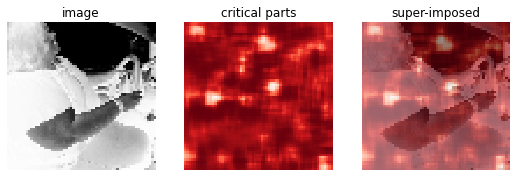

  Proba:
[ 0.9945  0.0002  0.0001  0.001   0.      0.      0.0021  0.0003  0.0001
  0.0016]
Min Proba for cls: c0; desc: normal driving; proba: 0.3133; nObs: 1
  img_16123.jpg:


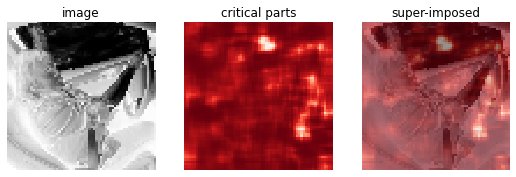

  Proba:
[ 0.3133  0.0009  0.0022  0.0009  0.0458  0.2324  0.3078  0.0036  0.0487
  0.0445]
  next best class: drinking


Max Proba for cls: c1; desc: texting - right; proba: 0.9853; nObs: 1
  img_44946.jpg:


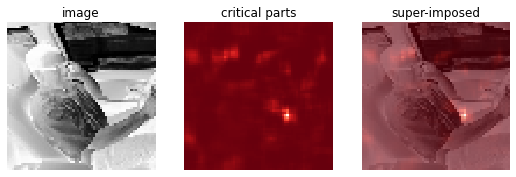

  Proba:
[ 0.001   0.9853  0.0002  0.0006  0.      0.      0.0004  0.0008  0.0109
  0.0008]
Min Proba for cls: c1; desc: texting - right; proba: 0.2535; nObs: 1
  img_22709.jpg:


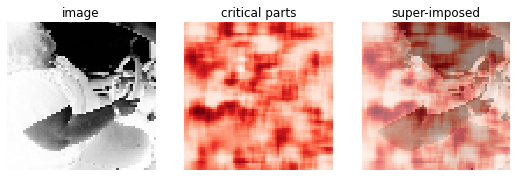

  Proba:
[ 0.2146  0.2535  0.1318  0.0005  0.      0.      0.005   0.2118  0.1825
  0.0003]
  next best class: normal driving


Max Proba for cls: c2; desc: talking on the phone - right; proba: 0.9882; nObs: 1
  img_45872.jpg:


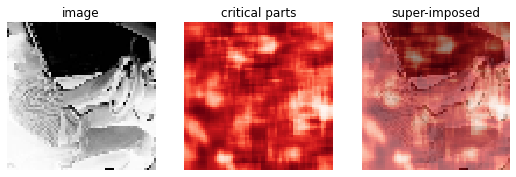

  Proba:
[ 0.0001  0.0006  0.9882  0.      0.      0.0021  0.005   0.0009  0.0007
  0.0023]
Min Proba for cls: c2; desc: talking on the phone - right; proba: 0.2634; nObs: 1
  img_28491.jpg:


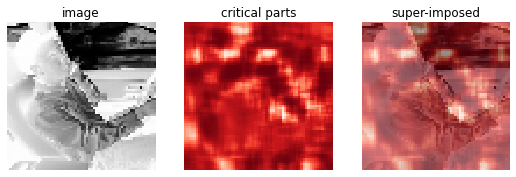

  Proba:
[ 0.2255  0.1953  0.2634  0.014   0.      0.      0.0714  0.1626  0.0672
  0.0004]
  next best class: normal driving


Max Proba for cls: c3; desc: texting - left; proba: 0.9896; nObs: 1
  img_31478.jpg:


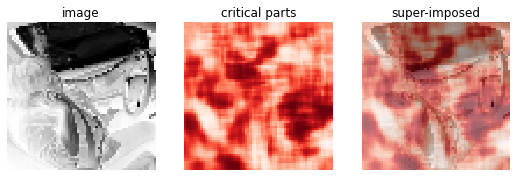

  Proba:
[ 0.0058  0.0002  0.      0.9896  0.0001  0.      0.001   0.0001  0.0001
  0.0032]
Min Proba for cls: c3; desc: texting - left; proba: 0.2978; nObs: 1
  img_91831.jpg:


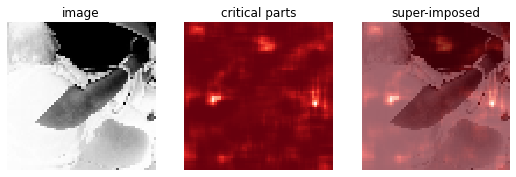

  Proba:
[ 0.0006  0.2457  0.0002  0.2978  0.      0.0013  0.2449  0.0001  0.2052
  0.0041]
  next best class: texting - right


Max Proba for cls: c4; desc: talking on the phone - left; proba: 0.9954; nObs: 1
  img_97353.jpg:


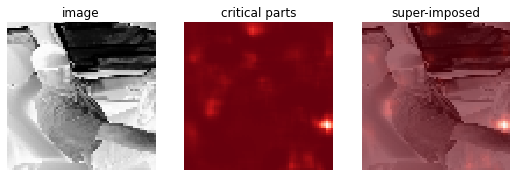

  Proba:
[ 0.      0.      0.      0.0007  0.9954  0.0002  0.0024  0.0001  0.
  0.0011]
Min Proba for cls: c4; desc: talking on the phone - left; proba: 0.3123; nObs: 1
  img_61091.jpg:


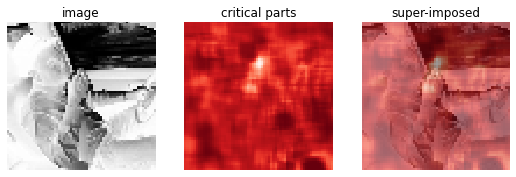

  Proba:
[ 0.2377  0.0084  0.1399  0.0002  0.3123  0.0009  0.0071  0.1362  0.1495
  0.0077]
  next best class: normal driving


Max Proba for cls: c5; desc: operating the radio; proba: 0.9942; nObs: 1
  img_95639.jpg:


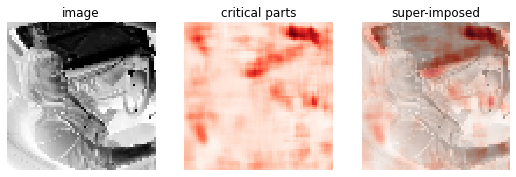

  Proba:
[ 0.0001  0.      0.0001  0.      0.0004  0.9942  0.0007  0.0003  0.0026
  0.0016]
Min Proba for cls: c5; desc: operating the radio; proba: 0.3180; nObs: 1
  img_11851.jpg:


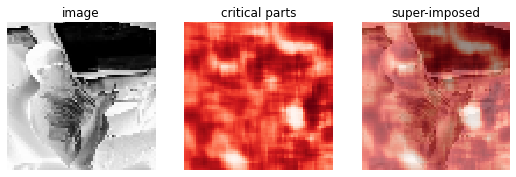

  Proba:
[ 0.0415  0.0032  0.0021  0.0036  0.0051  0.318   0.2076  0.0011  0.1533
  0.2645]
  next best class: talking to passenger


Max Proba for cls: c6; desc: drinking; proba: 0.9960; nObs: 1
  img_23732.jpg:


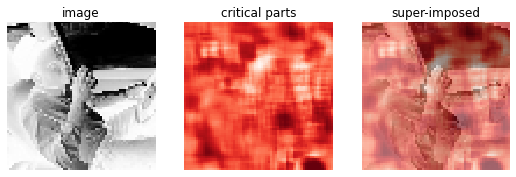

  Proba:
[ 0.0004  0.      0.0027  0.      0.      0.0001  0.996   0.      0.0006
  0.0001]
Min Proba for cls: c6; desc: drinking; proba: 0.2927; nObs: 1
  img_87691.jpg:


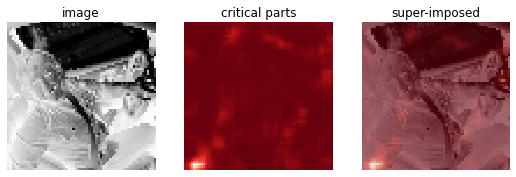

  Proba:
[ 0.2296  0.0013  0.2282  0.0003  0.      0.0022  0.2927  0.0093  0.235
  0.0013]
  next best class: hair and makeup


Max Proba for cls: c7; desc: reaching behind; proba: 0.9939; nObs: 1
  img_70545.jpg:


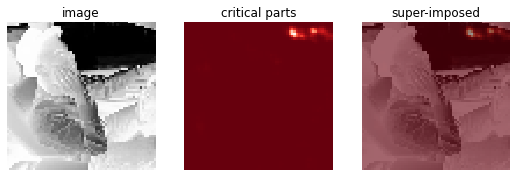

  Proba:
[ 0.0014  0.      0.0005  0.      0.0005  0.0001  0.002   0.9939  0.0016
  0.    ]
Min Proba for cls: c7; desc: reaching behind; proba: 0.2690; nObs: 1
  img_48365.jpg:


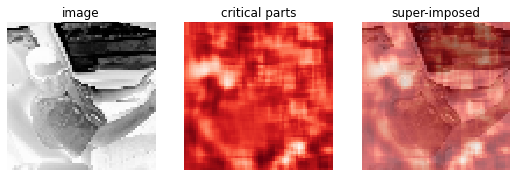

  Proba:
[ 0.2253  0.173   0.1944  0.0002  0.      0.0001  0.1314  0.269   0.0011
  0.0055]
  next best class: normal driving


Max Proba for cls: c8; desc: hair and makeup; proba: 0.9946; nObs: 1
  img_68465.jpg:


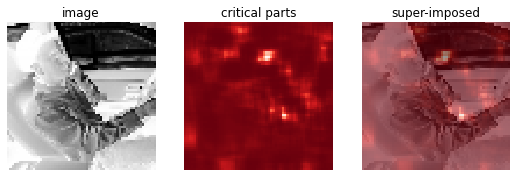

  Proba:
[ 0.0023  0.      0.0005  0.      0.0002  0.      0.0004  0.0003  0.9946
  0.0018]
Min Proba for cls: c8; desc: hair and makeup; proba: 0.2661; nObs: 1
  img_18003.jpg:


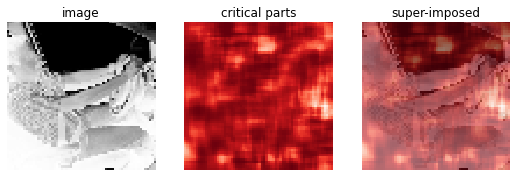

  Proba:
[ 0.188   0.0092  0.0421  0.2067  0.0026  0.0394  0.0089  0.0023  0.2661
  0.2348]
  next best class: talking to passenger


Max Proba for cls: c9; desc: talking to passenger; proba: 0.9891; nObs: 1
  img_92811.jpg:


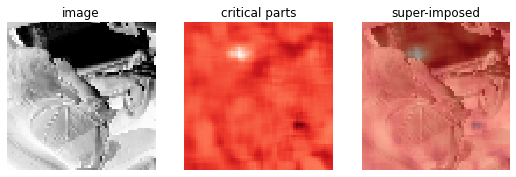

  Proba:
[ 0.0019  0.0004  0.      0.0011  0.0022  0.      0.0034  0.0001  0.0018
  0.9891]
Min Proba for cls: c9; desc: talking to passenger; proba: 0.3377; nObs: 1
  img_17020.jpg:


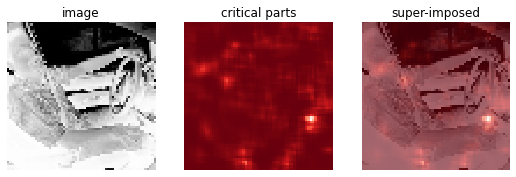

  Proba:
[ 0.2515  0.0021  0.0096  0.0122  0.0479  0.07    0.2394  0.001   0.0287
  0.3377]
  next best class: normal driving

  New prediction knts:
{'clsKnt': (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32), array([ 7823,  7232, 12264,  5528,  5031,  5987,  8196, 10511, 11815,  5339]))}
  duration: 627 seconds


In [83]:
selMdlDf, selObsVldRspPredProba, selObsNewRspPredProba = fitMdlLgtRgrSkl(
    glbObsFitFtrRsh, glbObsFitRsp, 
    nObsFit = glbObsFitFtrRsh.shape[0], 
    verbose = True)

#### This should belong inside the function fitMdlLgtRgrSkl

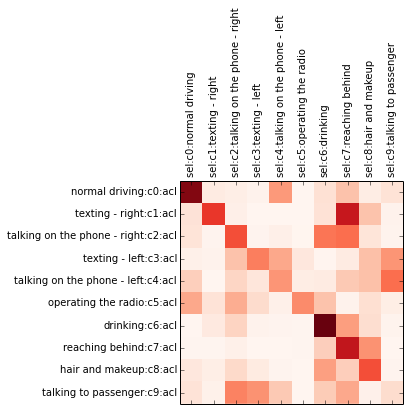

In [145]:
selObsVldRspPred = np.argmax(selObsVldRspPredProba, axis = 1)
yLbl = [glbRspClassDesc[glbRspClass[ix]] + ':' + 
          glbRspClass[ix] + ':acl' for ix in xrange(glbRspClassN)]
xLbl = ['sel:' + glbRspClass[ix] + ':' + glbRspClassDesc[glbRspClass[ix]]
           for ix in xrange(glbRspClassN)]
# print labels

from sklearn import metrics as skl_metrics
plt.matshow(skl_metrics.confusion_matrix(glbObsVldRsp, 
                                         selObsVldRspPred), cmap='Reds', 
            interpolation='none')
plt.yticks(np.arange(10), yLbl)
plt.xticks(np.arange(10), xLbl, rotation=90);

#### outlier(s):

In [97]:
# To ensure Kaggle evaluation metric is same as sklearn.metrics.log_loss
def mygetMetricLogLoss(lclRspPredProba, lclRsp, verbose = False):
    lclRspIndicator = np.zeros_like(lclRspPredProba)
    #print glbObsVldRsp[10]
    for cls in xrange(lclRspIndicator.shape[1]):
        lclRspIndicator[lclRsp == cls, cls] = 1

#     print np.unique(glbObsVldRsp, return_counts = True)
#     print tmpObsVldRspIndicator.sum(axis = 0)
#     print (tmpObsVldRspIndicator.sum(axis = 0) == np.unique(glbObsVldRsp, return_counts = True)[1])
    #tmpObsVldRspIndicator[glbObsVldRsp == 3, 3] = 1
    #tmpObsVldRspIndicator[0, glbObsVldRsp[0]]
#     print lclRspIndicator[10:16, :]

    # Scale proba to sum to 1 for each row
    tmpRspPredProba = lclRspPredProba
    sclRspPredProbaRowSum = tmpRspPredProba.sum(axis = 1)
    # print np.abs(sclObsVldRspPredProbaRowSum - 1.0)[10:16]
    # print 1e-05
    # print np.abs(sclObsVldRspPredProbaRowSum - 1.0)[10:16] > 1e-05
    sclRspPredProbaRowSumChk = (np.abs(sclRspPredProbaRowSum - 1.0) > 1e-15)
    if (sclRspPredProbaRowSumChk.sum() > 0):
        print 'row sums != 1 for %d obs' % (sclRspPredProbaRowSumChk.sum())
        print sclRspPredProbaRowSum[sclRspPredProbaRowSumChk]
        #print sclObsVldRspPredProbaRowSum[10:16]    
        sclRspPredProba = tmpRspPredProba / sclRspPredProbaRowSum
        tmpRspPredProba = sclRspPredProba
        
    # Bound proba to limit log fn outliers
    bndRspPredProba = tmpRspPredProba
    bndRspPredProba[bndRspPredProba > 1-1e-15] = 1-1e-15
    bndRspPredProba[bndRspPredProba < 0+1e-15] = 0+1e-15
    #print bndObsVldRspPredProba[10:16, :]    
    nModProba = (tmpRspPredProba != bndRspPredProba).sum()
    if (nModProba > 0):
        print 'minmax of probabilities modified %d cells' % (nModProba)
    tmpRspPredProba = bndRspPredProba    
    
    #print (lclRspIndicator * np.log(tmpRspPredProba))[10:16]
    
    logLossObs = (lclRspIndicator * np.log(tmpRspPredProba)).sum(axis = 1)
    if verbose:
#         print 'mygetMetricLogLoss: logLossObs shape: %s' % \
#             str(logLossObs.shape)
        print 'mygetMetricLogLoss: logLossObs outlier: %.4f; ix: %d' % \
            (np.min(logLossObs), np.argmin(logLossObs))
    logLoss = 0 - (logLossObs.sum() / tmpRspPredProba.shape[0])
    return(logLoss)

selLogLossVld = mygetMetricLogLoss(selObsVldRspPredProba, glbObsVldRsp, 
                         verbose = True)
assert abs(selLogLossVld - selMdlDf.ix[0, 'logLossVld']) < 0.0001, \
    'not same: %.4f != %.4f' % \
    (selLogLossVld, selMdlDf.ix[0, 'logLossVld'])
# from sklearn import metrics as skl_metrics
# print skl_metrics.log_loss(glbObsVldRsp, selObsVldRspPredProba)

mygetMetricLogLoss: logLossObs shape: (4347,)
mygetMetricLogLoss: logLossObs outlier: -18.8331; ix: 1903


In [103]:
print selObsVldRspPredProba[1903:1904]
print np.argmax(selObsVldRspPredProba[1903:1904], axis = 1)
print (np.argmax(selObsVldRspPredProba[1903:1904], axis = 1) == 0)
print (np.argmax(selObsVldRspPredProba[1903:1904], axis = 1) == 0).any()

[[  1.06309537e-02   2.10912414e-05   5.21527615e-01   1.83324841e-05
    6.62048069e-09   2.73947322e-04   1.89058938e-04   4.67137553e-01
    1.74032944e-04   2.74086816e-05]]
[2]
[False]
False


mydisplayImagePredictions: 2


Max Proba for cls: c2; desc: talking on the phone - right; proba: 0.5215; nObs: 1
  img_96019.jpg:


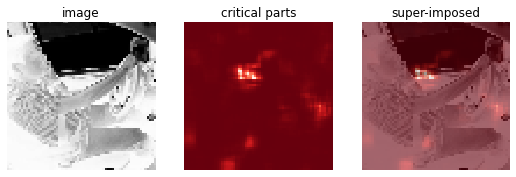

  Proba:
[ 0.0106  0.      0.5215  0.      0.      0.0003  0.0002  0.4671  0.0002
  0.    ]
Min Proba for cls: c2; desc: talking on the phone - right; proba: 0.5215; nObs: 1
  img_96019.jpg:


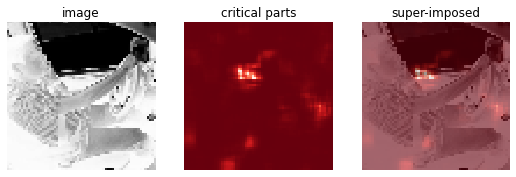

  Proba:
[ 0.0106  0.      0.5215  0.      0.      0.0003  0.0002  0.4671  0.0002
  0.    ]
  next best class: reaching behind


In [109]:
%run img_utils.py
mydisplayImagePredictions(selMdlDf.ix[0, 'model'],
            glbObsVldIdn[1903:1904], glbObsVldFtr[1903:1904], 
            glbObsVldRsp[1903:1904], selObsVldRspPredProba[1903:1904], 
            glbRspClass, glbRspClassDesc)

### Fit selected model on glbObsTrn


Logistic Regression (sklearn): nObsFit: 22424; 
[LibLinear]
  Fit accuracy:1.0000
  Fit  logLoss:0.0187

  Vld accuracy:1.0000
  Vld  logLoss:0.0185
[[484   0   0   0   0   0   0   0   0   0]
 [  0 478   0   0   0   0   0   0   0   0]
 [  0   0 452   0   0   0   0   0   0   0]
 [  0   0   0 443   0   0   0   0   0   0]
 [  0   0   0   0 459   0   0   0   0   0]
 [  0   0   0   0   0 422   0   0   0   0]
 [  0   0   0   0   0   0 443   0   0   0]
 [  0   0   0   0   0   0   0 350   0   0]
 [  0   0   0   0   0   0   0   0 364   0]
 [  0   0   0   0   0   0   0   0   0 452]]
mydisplayImagePredictions: 0


Max Proba for cls: c0; desc: normal driving; proba: 0.9992; nObs: 1
  img_62484.jpg:


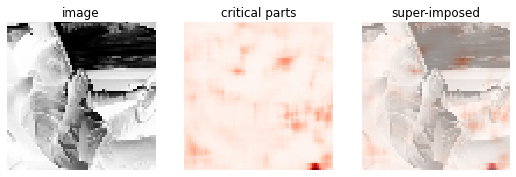

  Proba:
[ 0.9992  0.0004  0.      0.      0.0001  0.0001  0.      0.      0.
  0.0002]
Min Proba for cls: c0; desc: normal driving; proba: 0.8618; nObs: 1
  img_56357.jpg:


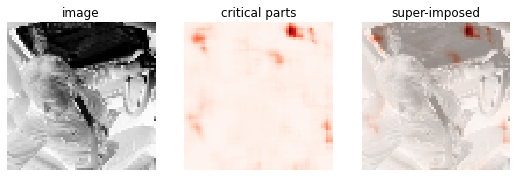

  Proba:
[ 0.8618  0.0031  0.062   0.0001  0.      0.      0.0032  0.0232  0.007
  0.0397]
  next best class: talking on the phone - right
mydisplayImagePredictions: 1


Max Proba for cls: c1; desc: texting - right; proba: 0.9995; nObs: 1
  img_15025.jpg:


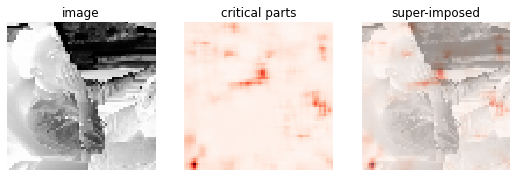

  Proba:
[ 0.      0.9995  0.      0.      0.      0.      0.0001  0.0001  0.
  0.0002]
Min Proba for cls: c1; desc: texting - right; proba: 0.8347; nObs: 1
  img_77183.jpg:


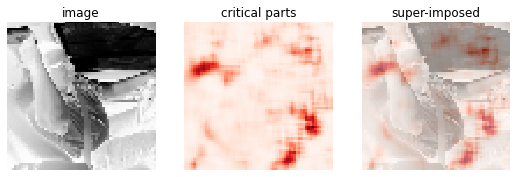

  Proba:
[ 0.0007  0.8347  0.0417  0.0001  0.0004  0.0058  0.      0.      0.0253
  0.0914]
  next best class: talking to passenger
mydisplayImagePredictions: 2


Max Proba for cls: c2; desc: talking on the phone - right; proba: 0.9983; nObs: 1
  img_28943.jpg:


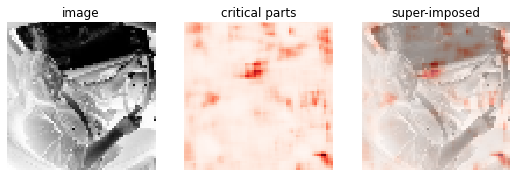

  Proba:
[ 0.      0.0002  0.9983  0.      0.0002  0.      0.0005  0.0003  0.0005
  0.0001]
Min Proba for cls: c2; desc: talking on the phone - right; proba: 0.7809; nObs: 1
  img_18370.jpg:


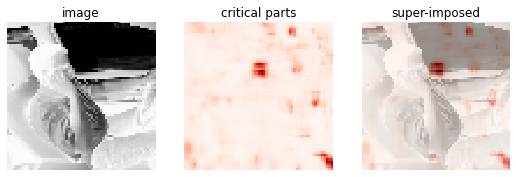

  Proba:
[ 0.0014  0.0349  0.7809  0.      0.0072  0.      0.0094  0.0299  0.0003
  0.1359]
  next best class: talking to passenger
mydisplayImagePredictions: 3


Max Proba for cls: c3; desc: texting - left; proba: 0.9984; nObs: 1
  img_97966.jpg:


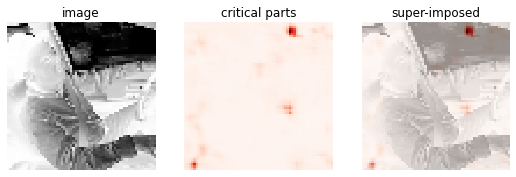

  Proba:
[ 0.0001  0.0001  0.      0.9984  0.0002  0.0007  0.      0.0001  0.0001
  0.0003]
Min Proba for cls: c3; desc: texting - left; proba: 0.7795; nObs: 1
  img_70379.jpg:


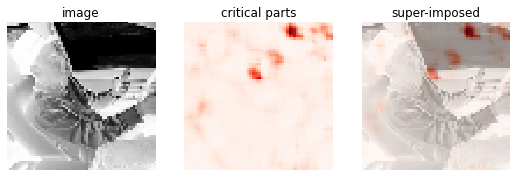

  Proba:
[ 0.1285  0.      0.      0.7795  0.0715  0.      0.      0.      0.0203
  0.0003]
  next best class: normal driving
mydisplayImagePredictions: 4


Max Proba for cls: c4; desc: talking on the phone - left; proba: 0.9988; nObs: 1
  img_31067.jpg:


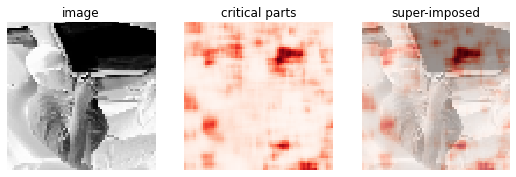

  Proba:
[ 0.0002  0.      0.      0.0002  0.9988  0.0004  0.      0.      0.
  0.0004]
Min Proba for cls: c4; desc: talking on the phone - left; proba: 0.8095; nObs: 1
  img_4967.jpg:


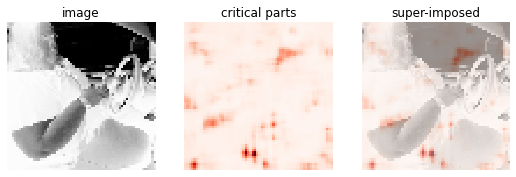

  Proba:
[ 0.0607  0.      0.1155  0.0046  0.8095  0.0003  0.0046  0.0008  0.0031
  0.0008]
  next best class: talking on the phone - right
mydisplayImagePredictions: 5


Max Proba for cls: c5; desc: operating the radio; proba: 0.9995; nObs: 1
  img_99497.jpg:


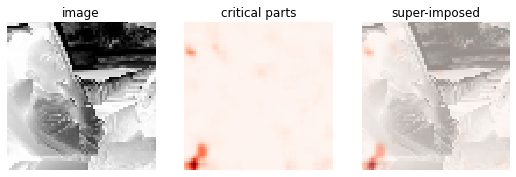

  Proba:
[ 0.      0.      0.      0.      0.      0.9995  0.0003  0.0001  0.0001
  0.    ]
Min Proba for cls: c5; desc: operating the radio; proba: 0.4800; nObs: 1
  img_68833.jpg:


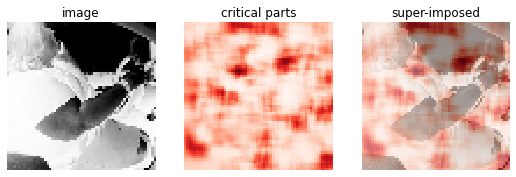

  Proba:
[ 0.1638  0.0297  0.1628  0.0001  0.0001  0.48    0.0239  0.0197  0.107
  0.013 ]
  next best class: normal driving
mydisplayImagePredictions: 6


Max Proba for cls: c6; desc: drinking; proba: 0.9997; nObs: 1
  img_27395.jpg:


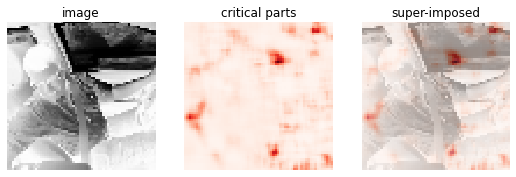

  Proba:
[ 0.      0.      0.      0.      0.      0.      0.9997  0.      0.0002
  0.    ]
Min Proba for cls: c6; desc: drinking; proba: 0.8296; nObs: 1
  img_46643.jpg:


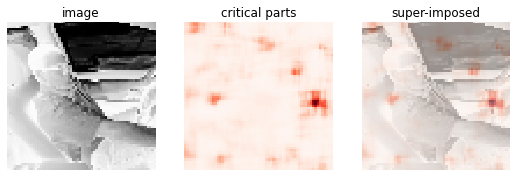

  Proba:
[ 0.0016  0.0002  0.0049  0.      0.1629  0.      0.8296  0.0007  0.0001
  0.0001]
  next best class: talking on the phone - left
mydisplayImagePredictions: 7


Max Proba for cls: c7; desc: reaching behind; proba: 0.9990; nObs: 1
  img_27363.jpg:


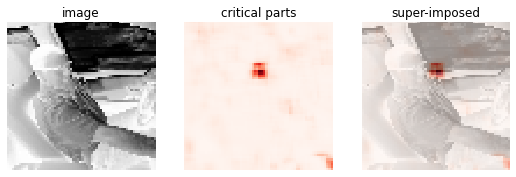

  Proba:
[ 0.      0.0002  0.0001  0.      0.0001  0.      0.0003  0.999   0.0002
  0.0002]
Min Proba for cls: c7; desc: reaching behind; proba: 0.7279; nObs: 1
  img_44695.jpg:


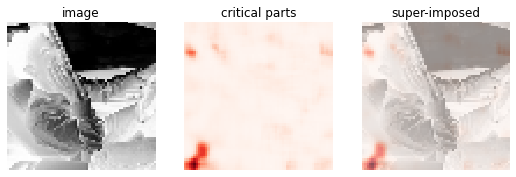

  Proba:
[ 0.0001  0.0005  0.      0.      0.009   0.0001  0.2153  0.7279  0.0003
  0.0468]
  next best class: drinking
mydisplayImagePredictions: 8


Max Proba for cls: c8; desc: hair and makeup; proba: 0.9992; nObs: 1
  img_6117.jpg:


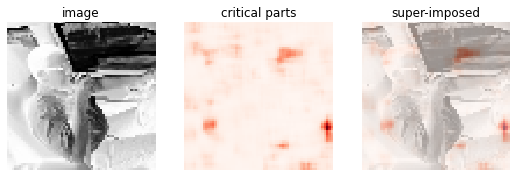

  Proba:
[ 0.0002  0.      0.      0.      0.0001  0.      0.      0.0001  0.9992
  0.0002]
Min Proba for cls: c8; desc: hair and makeup; proba: 0.7159; nObs: 1
  img_83533.jpg:


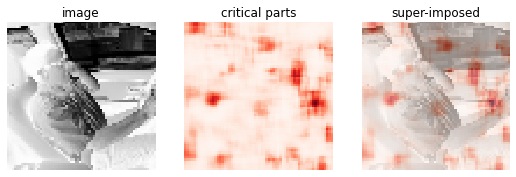

  Proba:
[ 0.      0.0017  0.018   0.      0.0253  0.      0.0021  0.2247  0.7159
  0.0123]
  next best class: reaching behind
mydisplayImagePredictions: 9


Max Proba for cls: c9; desc: talking to passenger; proba: 0.9990; nObs: 1
  img_8335.jpg:


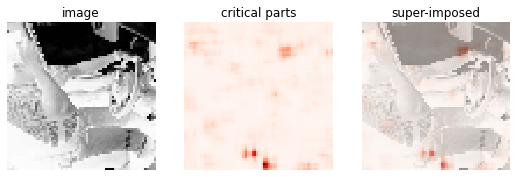

  Proba:
[ 0.0001  0.0002  0.      0.      0.      0.0004  0.0001  0.      0.0001
  0.999 ]
Min Proba for cls: c9; desc: talking to passenger; proba: 0.8619; nObs: 1
  img_95746.jpg:


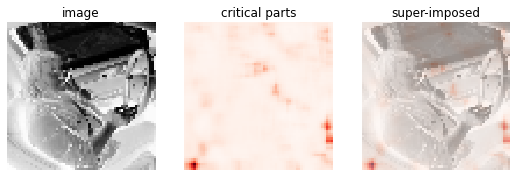

  Proba:
[ 0.0466  0.0001  0.      0.      0.      0.      0.0901  0.0005  0.0006
  0.8619]
  next best class: drinking

  New prediction knts:
{'clsKnt': (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32), array([ 6890,  7721, 12046,  6100,  5315,  7094,  7195,  6354, 13669,  7342]))}
  duration: 874 seconds


In [116]:
# mdlFinDf = fitMdlLgtRgr(glbObsTrnFtr, glbObsTrnRsp, nObsFit = glbObsTrnFtr.shape[0], 
#                      verbose = True)
finMdlDf, finObsVldRspPredProba, finObsNewRspPredProba = fitMdlLgtRgrSkl(
    glbObsTrnFtrRsh, glbObsTrnRsp, 
    nObsFit = glbObsTrnFtrRsh.shape[0], 
    verbose = True)

In [117]:
glbMdlDf = glbMdlDf.append(finMdlDf)
#mdlFinDf = mdlDf

In [118]:
glbMdlDf = glbMdlDf.set_index(srchParamsDct.keys(), drop = False)
print(glbMdlDf[list(set(glbMdlDf.columns) - set(srchParamsDct.keys()))])

        bestFit    accVld                                            predNew  \
nObsFit                                                                        
18077.0    True  0.343685  {u'clsKnt': ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [...   
15000.0   False  0.342535  {u'clsKnt': ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [...   
10000.0   False  0.358638  {u'clsKnt': ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [...   
5000.0    False  0.363699  {u'clsKnt': ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [...   
2000.0    False  0.341385  {u'clsKnt': ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [...   
1000.0    False  0.333333  {u'clsKnt': ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [...   
100.0     False  0.307108  {u'clsKnt': ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [...   
22424.0     NaN  1.000000  {u'clsKnt': ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [...   

         logLossVld  duration  \
nObsFit                         
18077.0    3.116799       597   
15000.0    3.085191       514   
10000.0    2.885114       317   
5000.0     2.610439       150   
2

In [119]:
%run img_utils.py
myexportDf(glbMdlDf, glbPickleFile['models'], save_drop_cols = None)
# glbMdlDf = mydspMdls(glbMdlDf)
# mysaveMdls()

NameError: global name 'os' is not defined

### Inspect prediction quality

#### outliers:

Same outlier as in selMdlDf['model']

mydisplayImagePredictions: 4


Max Proba for cls: c4; desc: talking on the phone - left; proba: 0.9533; nObs: 1
  img_96019.jpg:


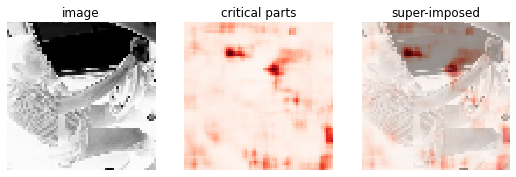

  Proba:
[ 0.0019  0.      0.0118  0.0276  0.9533  0.0028  0.0001  0.0014  0.0003
  0.0008]
Min Proba for cls: c4; desc: talking on the phone - left; proba: 0.9533; nObs: 1
  img_96019.jpg:


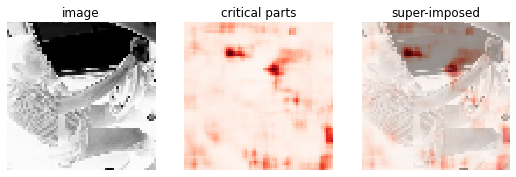

  Proba:
[ 0.0019  0.      0.0118  0.0276  0.9533  0.0028  0.0001  0.0014  0.0003
  0.0008]
  next best class: texting - left


In [120]:
mydisplayImagePredictions(finMdlDf.ix[0, 'model'],
            glbObsVldIdn[1903:1904], glbObsVldFtr[1903:1904], 
            glbObsVldRsp[1903:1904], finObsVldRspPredProba[1903:1904], 
            glbRspClass, glbRspClassDesc)

In [121]:
finLogLossVld = mygetMetricLogLoss(finObsVldRspPredProba, glbObsVldRsp, 
                         verbose = True)
assert abs(finLogLossVld - finMdlDf.ix[0, 'logLossVld']) < 0.0001, \
    'not same: %.4f != %.4f' % \
    (finLogLossVld, finMdlDf.ix[0, 'logLossVld'])

mygetMetricLogLoss: logLossObs shape: (4347,)
mygetMetricLogLoss: logLossObs outlier: -0.7340; ix: 790


mydisplayImagePredictions: 5


Max Proba for cls: c5; desc: operating the radio; proba: 0.4800; nObs: 1
  img_68833.jpg:


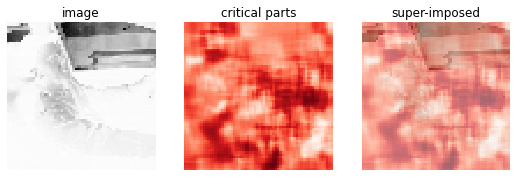

  Proba:
[ 0.1638  0.0297  0.1628  0.0001  0.0001  0.48    0.0239  0.0197  0.107
  0.013 ]
Min Proba for cls: c5; desc: operating the radio; proba: 0.4800; nObs: 1
  img_68833.jpg:


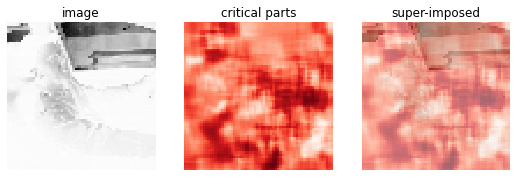

  Proba:
[ 0.1638  0.0297  0.1628  0.0001  0.0001  0.48    0.0239  0.0197  0.107
  0.013 ]
  next best class: normal driving


In [122]:
tmpObsVldIx = 790
mydisplayImagePredictions(finMdlDf.ix[0, 'model'],
            glbObsVldIdn[tmpObsVldIx:(tmpObsVldIx + 1)], 
            glbObsVldFtr[tmpObsVldIx:(tmpObsVldIx + 1)], 
            glbObsVldRsp[tmpObsVldIx:(tmpObsVldIx + 1)], 
            finObsVldRspPredProba[tmpObsVldIx:(tmpObsVldIx + 1)], 
            glbRspClass, glbRspClassDesc)

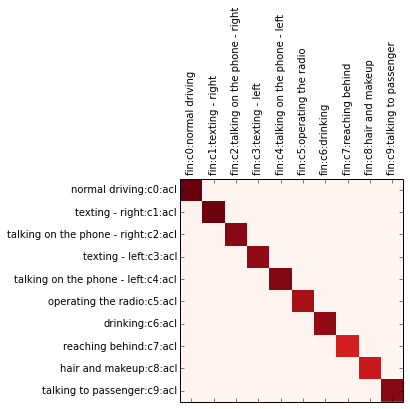

In [146]:
finObsVldRspPred = np.argmax(finObsVldRspPredProba, axis = 1)
yLbl = [glbRspClassDesc[glbRspClass[ix]] + ':' + 
          glbRspClass[ix] + ':acl' for ix in xrange(glbRspClassN)]
xLbl = ['fin:' + glbRspClass[ix] + ':' + glbRspClassDesc[glbRspClass[ix]]
           for ix in xrange(glbRspClassN)]
# print labels

from sklearn import metrics as skl_metrics
plt.matshow(skl_metrics.confusion_matrix(glbObsVldRsp, 
                                         finObsVldRspPred), cmap='Reds', 
            interpolation='none')
plt.yticks(np.arange(10), yLbl)
plt.xticks(np.arange(10), xLbl, rotation=90);

### Predict ObsNew using selMdl & finMdl

In [126]:
selObsNewRspPred = np.argmax(selObsNewRspPredProba, axis = 1)
print np.unique(selObsNewRspPred, return_counts = True)
print np.unique(selObsNewRspPred, return_counts = True)[1] * 1.0 / \
      np.unique(glbObsTrnRsp, return_counts = True)[1]
# tmpObsTrnRsp = np.argmax(glbObsTrnRsp, axis = 1)
# print np.unique(selObsNewRspPred, return_counts = True)[1] * 1.0 / \
#       np.unique(tmpObsTrnRsp, return_counts = True)[1]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([ 7823,  7232, 12264,  5528,  5031,  5987,  8196, 10511, 11815,  5339]))
[ 3.14302933  3.1901191   5.29305136  2.35635124  2.16294067  2.58953287
  3.52516129  5.25024975  6.1826269   2.50775012]


In [127]:
finObsNewRspPred = np.argmax(finObsNewRspPredProba, axis = 1)
print np.unique(finObsNewRspPred, return_counts = True)
print np.unique(finObsNewRspPred, return_counts = True)[1] * 1.0 / \
      np.unique(glbObsTrnRsp, return_counts = True)[1]
# tmpObsTrnRsp = np.argmax(glbObsTrnRsp, axis = 1)
# print np.unique(finObsNewRspPred, return_counts = True)[1] * 1.0 / \
#       np.unique(tmpObsTrnRsp, return_counts = True)[1]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([ 6890,  7721, 12046,  6100,  5315,  7094,  7195,  6354, 13669,  7342]))
[ 2.76817999  3.40582267  5.19896418  2.6001705   2.28503869  3.0683391
  3.09462366  3.17382617  7.15279958  3.4485674 ]


### Image examples from selObsNewRspPred



Max Proba for cls: c0; desc: normal driving; proba: 0.9962; nObs: 1
  img_23529.jpg:


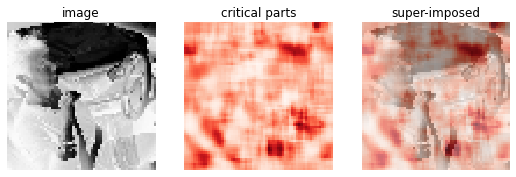

  Proba:
[ 0.9962  0.0003  0.0001  0.0003  0.0003  0.0003  0.0001  0.0009  0.0004
  0.0011]
Min Proba for cls: c0; desc: normal driving; proba: 0.2216; nObs: 1
  img_71973.jpg:


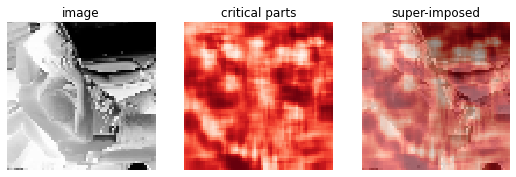

  Proba:
[ 0.2216  0.0991  0.1063  0.2152  0.0045  0.1379  0.0021  0.1534  0.0198
  0.0399]
  next best class: texting - left


Max Proba for cls: c1; desc: texting - right; proba: 0.9972; nObs: 1
  img_47548.jpg:


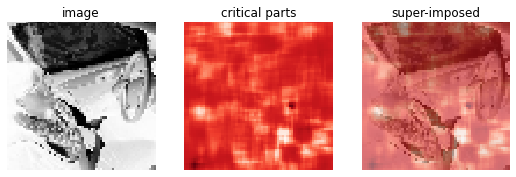

  Proba:
[ 0.      0.9972  0.      0.      0.      0.      0.      0.0015  0.0003
  0.0009]
Min Proba for cls: c1; desc: texting - right; proba: 0.2059; nObs: 1
  img_64000.jpg:


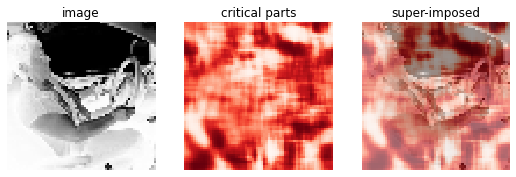

  Proba:
[ 0.1114  0.2059  0.1986  0.      0.      0.      0.1946  0.1837  0.1057
  0.0001]
  next best class: talking on the phone - right


Max Proba for cls: c2; desc: talking on the phone - right; proba: 0.9947; nObs: 1
  img_40713.jpg:


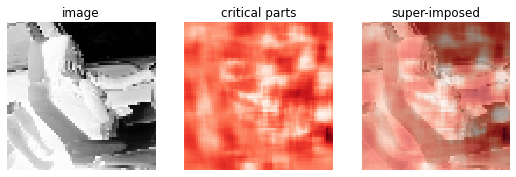

  Proba:
[ 0.0002  0.0004  0.9947  0.      0.      0.0006  0.0016  0.0005  0.002   0.    ]
Min Proba for cls: c2; desc: talking on the phone - right; proba: 0.2123; nObs: 1
  img_25381.jpg:


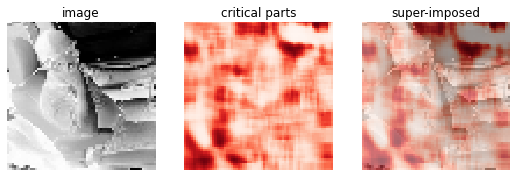

  Proba:
[ 0.1581  0.      0.2123  0.      0.2048  0.      0.1959  0.2091  0.0197
  0.0002]
  next best class: reaching behind


Max Proba for cls: c3; desc: texting - left; proba: 0.9976; nObs: 1
  img_98358.jpg:


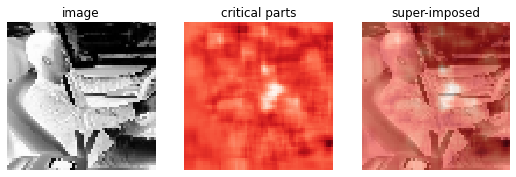

  Proba:
[ 0.0007  0.      0.0002  0.9976  0.0004  0.0002  0.      0.0002  0.0005
  0.    ]
Min Proba for cls: c3; desc: texting - left; proba: 0.2267; nObs: 1
  img_38206.jpg:


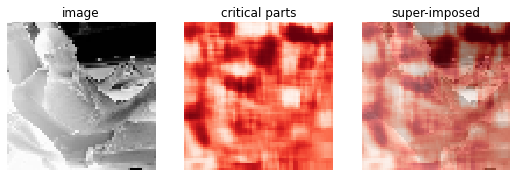

  Proba:
[ 0.2022  0.0546  0.0071  0.2267  0.0001  0.1813  0.1304  0.0062  0.0177
  0.1736]
  next best class: normal driving


Max Proba for cls: c4; desc: talking on the phone - left; proba: 0.9982; nObs: 1
  img_6736.jpg:


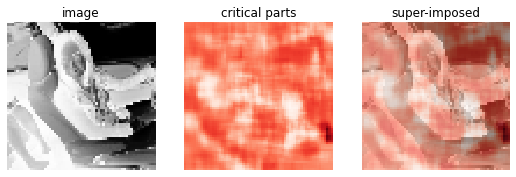

  Proba:
[ 0.0001  0.0001  0.      0.0001  0.9982  0.      0.0006  0.0003  0.0003
  0.0003]
Min Proba for cls: c4; desc: talking on the phone - left; proba: 0.2061; nObs: 1
  img_61787.jpg:


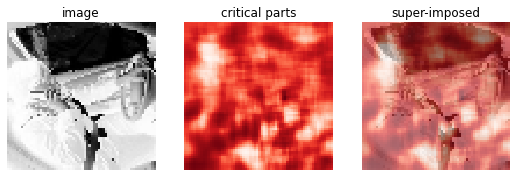

  Proba:
[ 0.2061  0.      0.206   0.0002  0.2061  0.0002  0.      0.      0.1912
  0.1901]
  next best class: normal driving


Max Proba for cls: c5; desc: operating the radio; proba: 0.9989; nObs: 1
  img_74472.jpg:


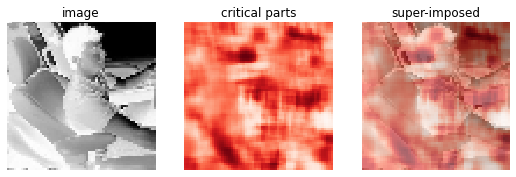

  Proba:
[ 0.      0.      0.0003  0.0004  0.      0.9989  0.      0.0002  0.0002
  0.    ]
Min Proba for cls: c5; desc: operating the radio; proba: 0.1939; nObs: 1
  img_18218.jpg:


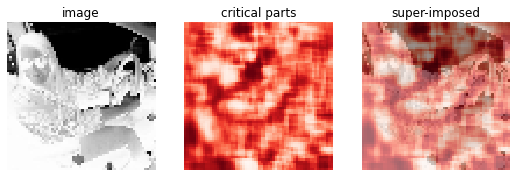

  Proba:
[ 0.1923  0.      0.0936  0.1899  0.1357  0.1939  0.      0.1934  0.
  0.0013]
  next best class: reaching behind


Max Proba for cls: c6; desc: drinking; proba: 0.9990; nObs: 1
  img_31600.jpg:


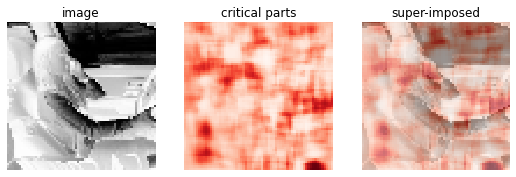

  Proba:
[ 0.      0.0008  0.      0.      0.      0.      0.999   0.      0.0002
  0.    ]
Min Proba for cls: c6; desc: drinking; proba: 0.2084; nObs: 1
  img_79573.jpg:


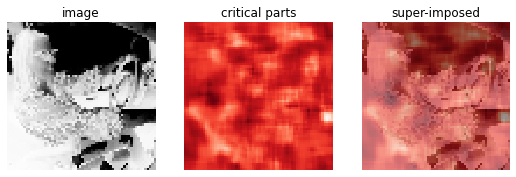

  Proba:
[ 0.1987  0.204   0.1879  0.      0.      0.      0.2084  0.1873  0.0003
  0.0133]
  next best class: texting - right


Max Proba for cls: c7; desc: reaching behind; proba: 0.9994; nObs: 1
  img_38342.jpg:


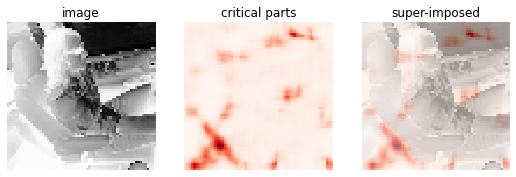

  Proba:
[ 0.      0.      0.0001  0.      0.      0.0001  0.0004  0.9994  0.      0.    ]
Min Proba for cls: c7; desc: reaching behind; proba: 0.2192; nObs: 1
  img_57676.jpg:


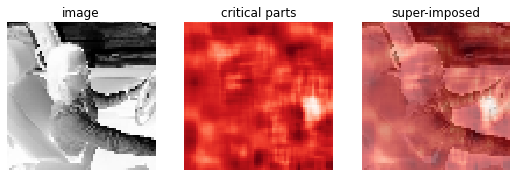

  Proba:
[ 0.0921  0.0201  0.0037  0.2136  0.0395  0.129   0.1652  0.2192  0.0062
  0.1115]
  next best class: texting - left


Max Proba for cls: c8; desc: hair and makeup; proba: 0.9997; nObs: 1
  img_36254.jpg:


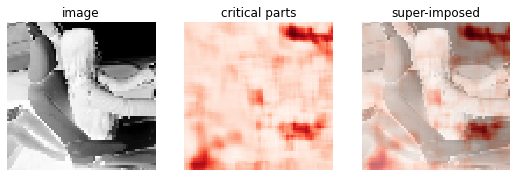

  Proba:
[ 0.0001  0.      0.      0.      0.      0.      0.0001  0.0001  0.9997
  0.    ]
Min Proba for cls: c8; desc: hair and makeup; proba: 0.2055; nObs: 1
  img_83200.jpg:


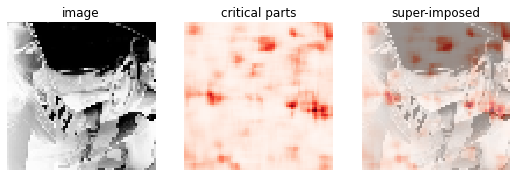

  Proba:
[ 0.0001  0.1555  0.093   0.      0.      0.0002  0.2     0.196   0.2055
  0.1497]
  next best class: drinking


Max Proba for cls: c9; desc: talking to passenger; proba: 0.9951; nObs: 1
  img_89887.jpg:


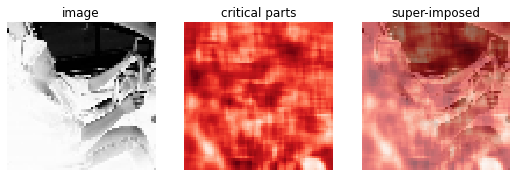

  Proba:
[ 0.002   0.      0.0004  0.      0.      0.0018  0.0002  0.0003  0.0001
  0.9951]
Min Proba for cls: c9; desc: talking to passenger; proba: 0.2246; nObs: 1
  img_43961.jpg:


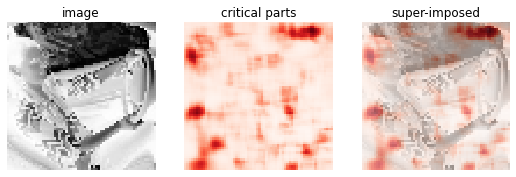

  Proba:
[ 0.0069  0.0056  0.      0.1793  0.0021  0.1252  0.0652  0.1866  0.2045
  0.2246]
  next best class: hair and makeup


In [131]:
mydisplayImagePredictions(selMdlDf.ix[0, 'model'],
            glbObsNewIdn, 
            glbObsNewFtr, 
            selObsNewRspPred, 
            selObsNewRspPredProba, 
            glbRspClass, glbRspClassDesc)

### Image examples from finObsNewRspPred



Max Proba for cls: c0; desc: normal driving; proba: 0.9964; nObs: 1
  img_53038.jpg:


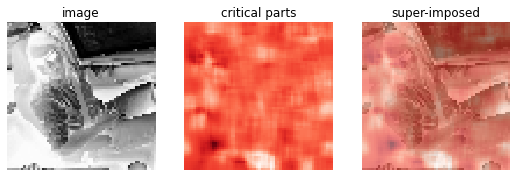

  Proba:
[ 0.9964  0.0011  0.      0.001   0.0003  0.0002  0.      0.0002  0.0006
  0.0001]
Min Proba for cls: c0; desc: normal driving; proba: 0.2118; nObs: 1
  img_61787.jpg:


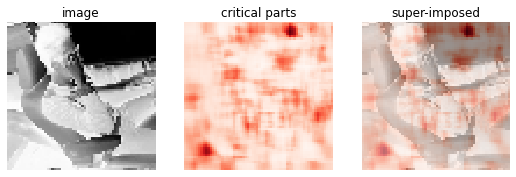

  Proba:
[ 0.2118  0.      0.211   0.0001  0.1922  0.0035  0.      0.      0.1713
  0.2101]
  next best class: talking on the phone - right


Max Proba for cls: c1; desc: texting - right; proba: 0.9985; nObs: 1
  img_47548.jpg:


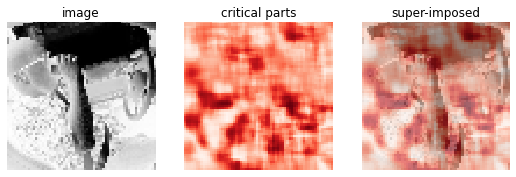

  Proba:
[ 0.      0.9985  0.      0.      0.      0.      0.      0.0001  0.0001
  0.0013]
Min Proba for cls: c1; desc: texting - right; proba: 0.2176; nObs: 1
  img_24206.jpg:


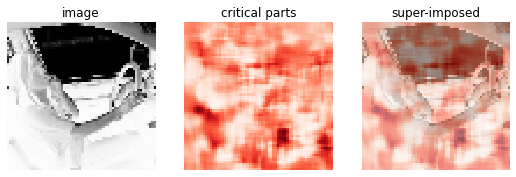

  Proba:
[ 0.1845  0.2176  0.0623  0.0025  0.      0.      0.2158  0.1837  0.1336
  0.    ]
  next best class: drinking


Max Proba for cls: c2; desc: talking on the phone - right; proba: 0.9974; nObs: 1
  img_78899.jpg:


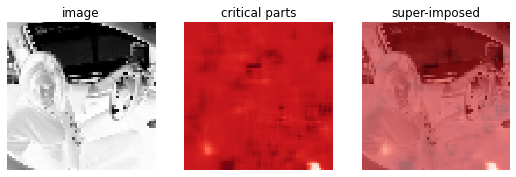

  Proba:
[ 0.0001  0.0002  0.9974  0.0004  0.      0.0007  0.0008  0.      0.0002
  0.0002]
Min Proba for cls: c2; desc: talking on the phone - right; proba: 0.2074; nObs: 1
  img_21029.jpg:


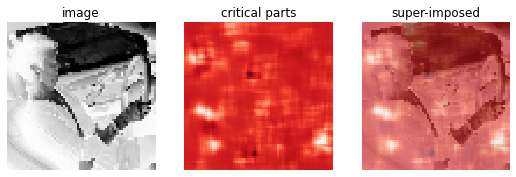

  Proba:
[ 0.2074  0.2057  0.2074  0.      0.      0.      0.0007  0.1815  0.1626
  0.0347]
  next best class: normal driving


Max Proba for cls: c3; desc: texting - left; proba: 0.9985; nObs: 1
  img_81613.jpg:


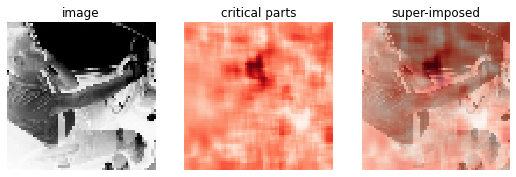

  Proba:
[ 0.0001  0.      0.      0.9985  0.0001  0.      0.      0.0006  0.
  0.0006]
Min Proba for cls: c3; desc: texting - left; proba: 0.2183; nObs: 1
  img_6901.jpg:


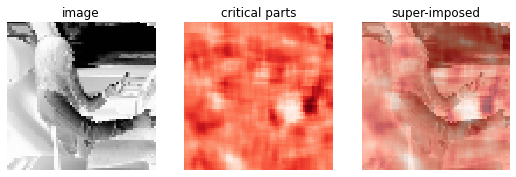

  Proba:
[ 0.1508  0.0558  0.1871  0.2183  0.1444  0.0001  0.0181  0.2134  0.0016
  0.0104]
  next best class: reaching behind


Max Proba for cls: c4; desc: talking on the phone - left; proba: 0.9990; nObs: 1
  img_80992.jpg:


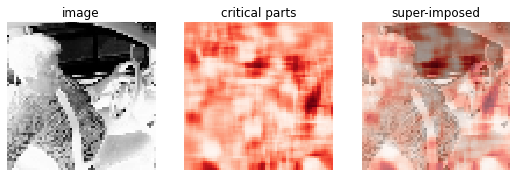

  Proba:
[ 0.      0.0001  0.0001  0.0001  0.999   0.      0.0002  0.0005  0.
  0.0001]
Min Proba for cls: c4; desc: talking on the phone - left; proba: 0.2126; nObs: 1
  img_40924.jpg:


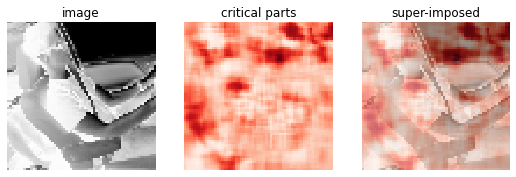

  Proba:
[ 0.208   0.008   0.      0.1665  0.2126  0.1963  0.0091  0.0216  0.0409
  0.1371]
  next best class: normal driving


Max Proba for cls: c5; desc: operating the radio; proba: 0.9994; nObs: 1
  img_91671.jpg:


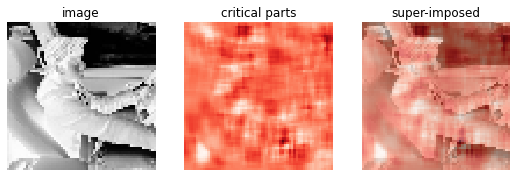

  Proba:
[ 0.      0.      0.0001  0.      0.0002  0.9994  0.      0.0001  0.0001
  0.    ]
Min Proba for cls: c5; desc: operating the radio; proba: 0.2284; nObs: 1
  img_50771.jpg:


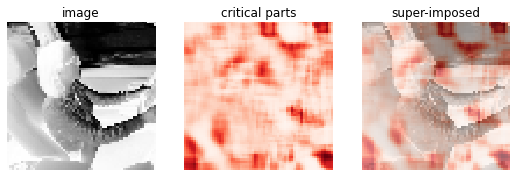

  Proba:
[ 0.0001  0.1213  0.2122  0.2115  0.0078  0.2284  0.2177  0.      0.0002
  0.0009]
  next best class: drinking


Max Proba for cls: c6; desc: drinking; proba: 0.9991; nObs: 1
  img_31600.jpg:


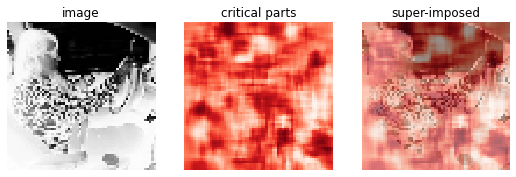

  Proba:
[ 0.      0.0003  0.      0.      0.      0.0005  0.9991  0.      0.      0.    ]
Min Proba for cls: c6; desc: drinking; proba: 0.2239; nObs: 1
  img_43430.jpg:


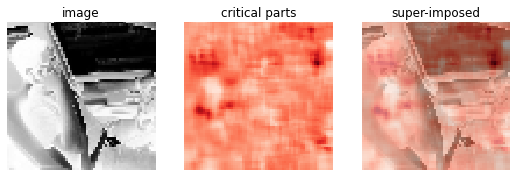

  Proba:
[ 0.003   0.0002  0.0804  0.2216  0.      0.2212  0.2239  0.      0.0332
  0.2165]
  next best class: texting - left


Max Proba for cls: c7; desc: reaching behind; proba: 0.9995; nObs: 1
  img_61465.jpg:


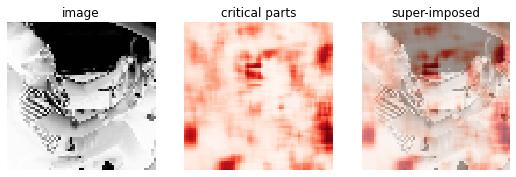

  Proba:
[ 0.      0.      0.      0.      0.0001  0.      0.0002  0.9995  0.0002
  0.    ]
Min Proba for cls: c7; desc: reaching behind; proba: 0.1959; nObs: 1
  img_97643.jpg:


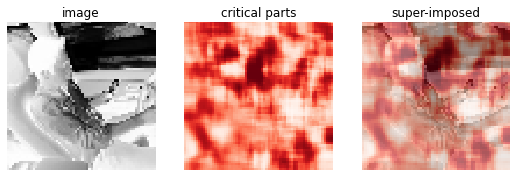

  Proba:
[ 0.1193  0.1951  0.184   0.      0.      0.      0.1604  0.1959  0.1388
  0.0065]
  next best class: texting - right


Max Proba for cls: c8; desc: hair and makeup; proba: 0.9994; nObs: 1
  img_92368.jpg:


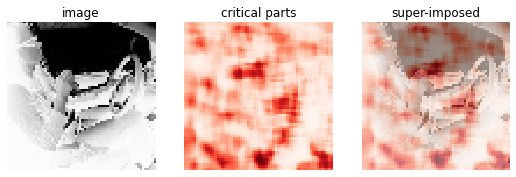

  Proba:
[ 0.      0.0001  0.      0.      0.      0.      0.      0.0004  0.9994
  0.0001]
Min Proba for cls: c8; desc: hair and makeup; proba: 0.2227; nObs: 1
  img_33443.jpg:


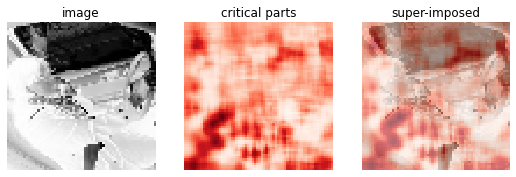

  Proba:
[ 0.0001  0.1716  0.15    0.0517  0.0046  0.2087  0.1183  0.0093  0.2227
  0.063 ]
  next best class: operating the radio


Max Proba for cls: c9; desc: talking to passenger; proba: 0.9984; nObs: 1
  img_31472.jpg:


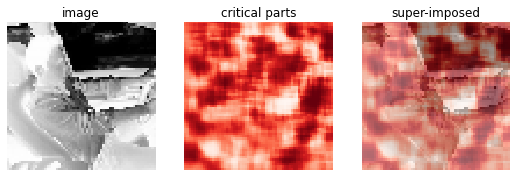

  Proba:
[ 0.0007  0.      0.      0.      0.0002  0.0001  0.      0.0004  0.0002
  0.9984]
Min Proba for cls: c9; desc: talking to passenger; proba: 0.2038; nObs: 1
  img_26171.jpg:


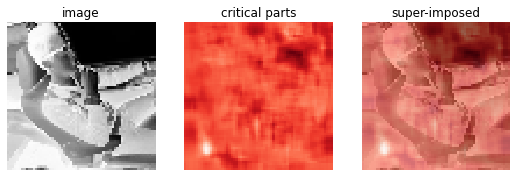

  Proba:
[ 0.1402  0.0001  0.1163  0.2015  0.      0.1417  0.1964  0.      0.
  0.2038]
  next best class: texting - left


In [130]:
%run img_utils.py
mydisplayImagePredictions(finMdlDf.ix[0, 'model'],
            glbObsNewIdn, 
            glbObsNewFtr, 
            finObsNewRspPred, 
            finObsNewRspPredProba, 
            glbRspClass, glbRspClassDesc)

### Differences between selObsNewRspPredProba & finObsNewRspPredProba

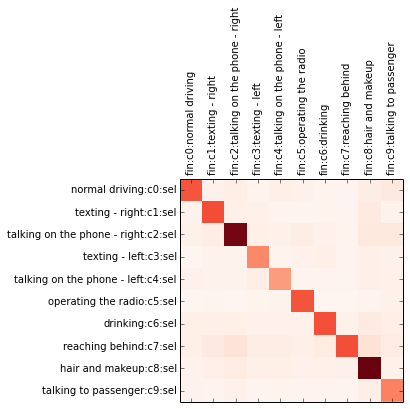

In [143]:
selLbl = [glbRspClassDesc[glbRspClass[ix]] + ':' + 
          glbRspClass[ix] + ':sel' for ix in xrange(glbRspClassN)]
finLbl = ['fin:' + glbRspClass[ix] + ':' + glbRspClassDesc[glbRspClass[ix]]
           for ix in xrange(glbRspClassN)]
# print labels

from sklearn import metrics as skl_metrics
plt.matshow(skl_metrics.confusion_matrix(selObsNewRspPred, 
                                         finObsNewRspPred), cmap='Reds', 
            interpolation='none')
plt.yticks(np.arange(10), selLbl)
plt.xticks(np.arange(10), finLbl, rotation=90);

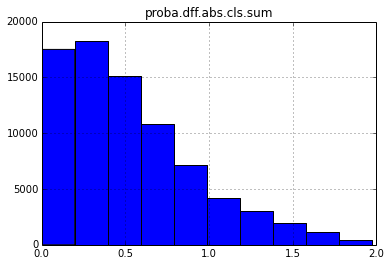

                 idn    idx  proba.dff.abs.cls.sum
21981  img_33430.jpg  21981               1.974949
54846  img_71354.jpg  54846               1.965496
47356  img_62703.jpg  47356               1.963690
41951  img_56458.jpg  41951               1.962529
62576  img_80264.jpg  62576               1.960669
40662  img_54991.jpg  40662               1.959342
44055   img_5889.jpg  44055               1.957102
23604  img_35304.jpg  23604               1.952917
60114  img_77459.jpg  60114               1.951104
31043  img_43911.jpg  31043               1.945856

  img_33430.jpg:


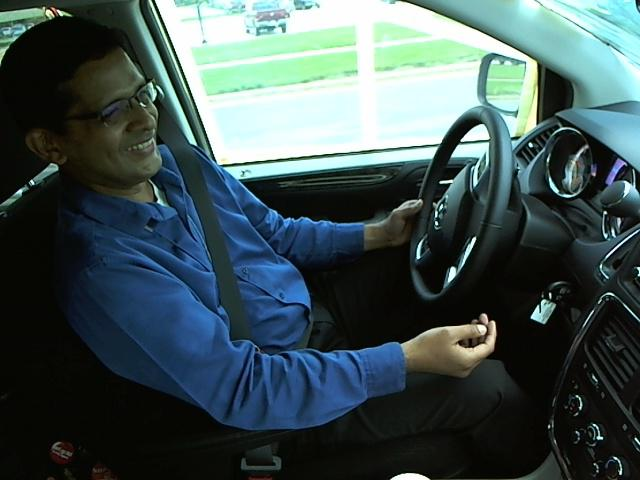

Sel Proba for cls: 7; desc:                reaching behind; proba: 0.7169
Fin Proba for cls: 4; desc:    talking on the phone - left; proba: 0.5757

  img_71354.jpg:


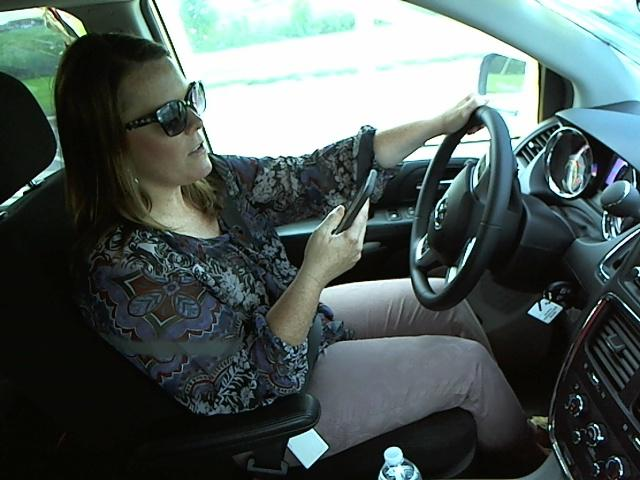

Sel Proba for cls: 7; desc:                reaching behind; proba: 0.8279
Fin Proba for cls: 5; desc:            operating the radio; proba: 0.9812

  img_62703.jpg:


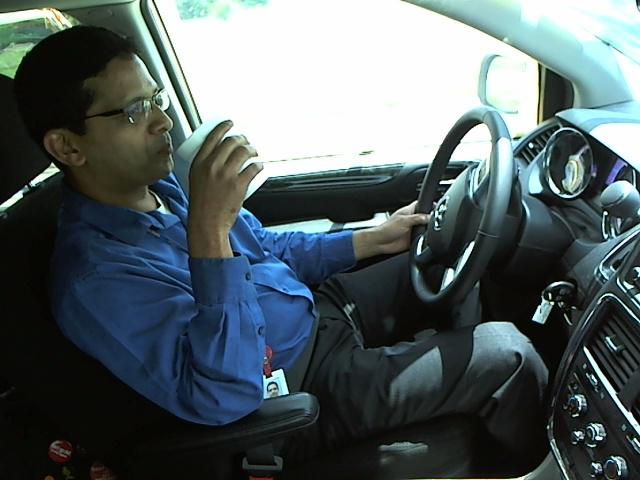

Sel Proba for cls: 7; desc:                reaching behind; proba: 0.6360
Fin Proba for cls: 9; desc:           talking to passenger; proba: 0.7674

  img_56458.jpg:


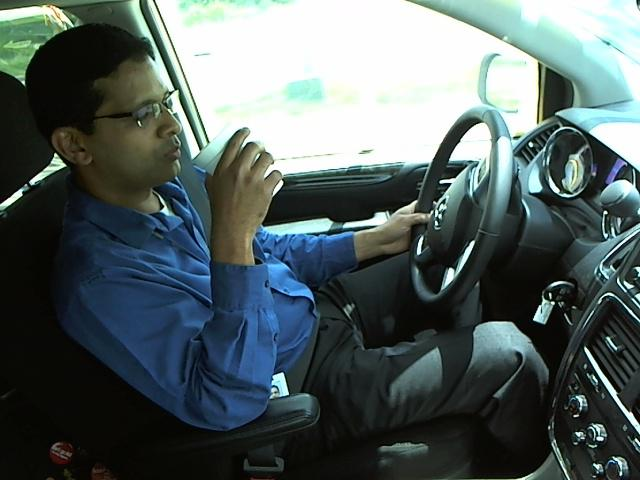

Sel Proba for cls: 7; desc:                reaching behind; proba: 0.6809
Fin Proba for cls: 9; desc:           talking to passenger; proba: 0.9058

  img_80264.jpg:


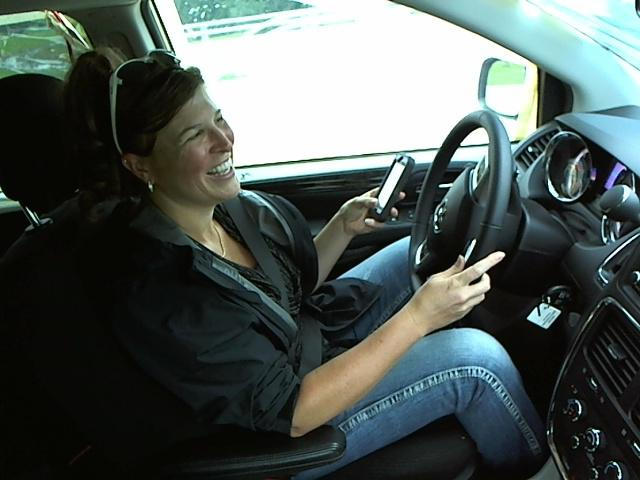

Sel Proba for cls: 6; desc:                       drinking; proba: 0.9554
Fin Proba for cls: 3; desc:                 texting - left; proba: 0.9787

  img_54991.jpg:


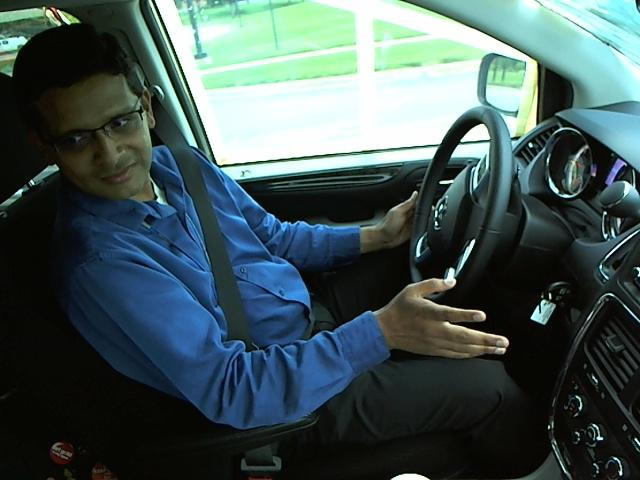

Sel Proba for cls: 7; desc:                reaching behind; proba: 0.6769
Fin Proba for cls: 3; desc:                 texting - left; proba: 0.6623

  img_5889.jpg:


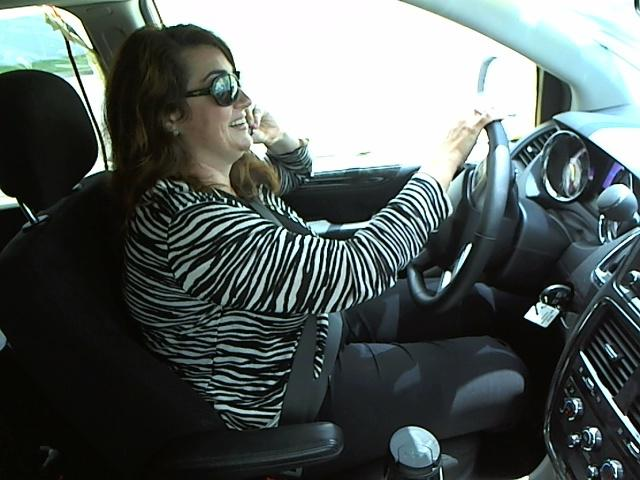

Sel Proba for cls: 7; desc:                reaching behind; proba: 0.7463
Fin Proba for cls: 0; desc:                 normal driving; proba: 0.8892

  img_35304.jpg:


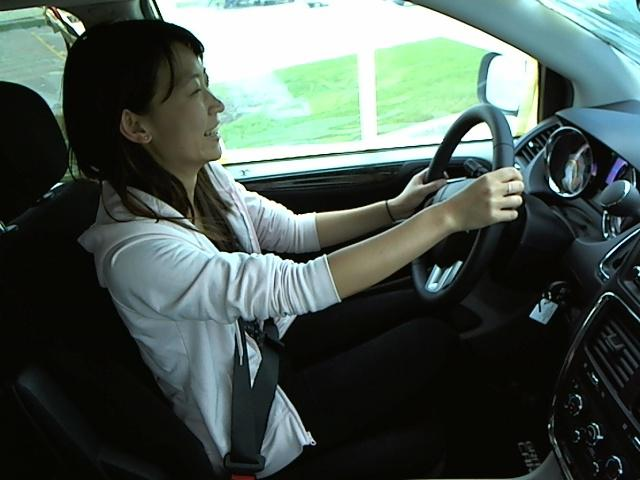

Sel Proba for cls: 2; desc:   talking on the phone - right; proba: 0.4967
Fin Proba for cls: 4; desc:    talking on the phone - left; proba: 0.9666

  img_77459.jpg:


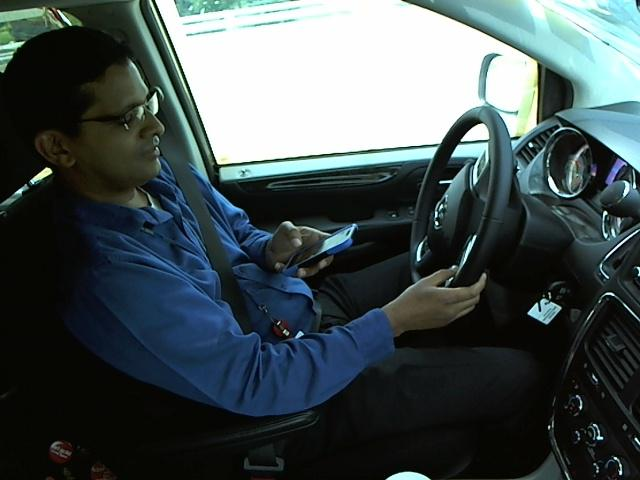

Sel Proba for cls: 7; desc:                reaching behind; proba: 0.4788
Fin Proba for cls: 3; desc:                 texting - left; proba: 0.9712

  img_43911.jpg:


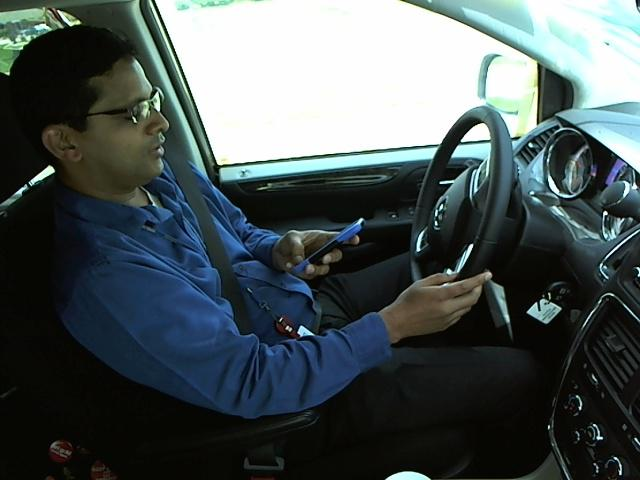

Sel Proba for cls: 7; desc:                reaching behind; proba: 0.9355
Fin Proba for cls: 3; desc:                 texting - left; proba: 0.5527


In [138]:
finSelProbaDffAbs = abs(finObsNewRspPredProba - selObsNewRspPredProba)
finSelProbaDffAbsObsSum = np.sum(finSelProbaDffAbs, axis = 1)
finSelDf = pd.DataFrame({
        'idx': range(glbObsNewRsp.shape[0]),
        'idn': glbObsNewIdn,
        'proba.dff.abs.cls.sum' : finSelProbaDffAbsObsSum
    })
finSelDf = finSelDf.sort_values('proba.dff.abs.cls.sum', ascending = False)
finSelDf.hist('proba.dff.abs.cls.sum')
plt.show()
print finSelDf[:10]

for ix in xrange(10):
    imgFilePth = os.getcwd() + '/data/' + glbDataFile['newFoldersPth'] + '/' + \
                        glbObsNewIdn[finSelDf.iloc[ix]['idx']]
#     print '\n  %s:' % imgFilePth    
    print '\n  %s:' % (glbObsNewIdn[finSelDf.iloc[ix]['idx']])
    jpgfile = Image(imgFilePth, format = 'jpg', 
                    width = glbImg['size'] * 4, height = glbImg['size'] * 4)
    display(jpgfile)
    
    selCls = np.argmax(selObsNewRspPredProba[finSelDf.iloc[ix]['idx'], :])
    print 'Sel Proba for cls: %s; desc: %30s; proba: %0.4f' % \
            (selCls, glbRspClassDesc['c' + str(selCls)], 
             np.max(selObsNewRspPredProba[finSelDf.iloc[ix]['idx'], :]))
        
    finCls = np.argmax(finObsNewRspPredProba[finSelDf.iloc[ix]['idx'], :])
    print 'Fin Proba for cls: %s; desc: %30s; proba: %0.4f' % \
            (finCls, glbRspClassDesc['c' + str(finCls)], 
             np.max(finObsNewRspPredProba[finSelDf.iloc[ix]['idx'], :])) 

### Output submission

In [156]:
# %run img_glbSpec_SFDD_ImgSz_64.py
print '\n selMdl:'
glbwriteSubmission(glbObsNewIdn, selObsNewRspPredProba, 
    'img_02_fit_lgtRgrSkl_SFDD_ImgSz_' + str(glbImg['size']) + '_sbmt_sel.csv')
print '\n finMdl:'
glbwriteSubmission(glbObsNewIdn, finObsNewRspPredProba, 
    'img_02_fit_lgtRgrSkl_SFDD_ImgSz_' + str(glbImg['size']) + '_sbmt_fin.csv')


 selMdl:
                           img        c0            c1        c2        c3  \
img                                                                          
img_1.jpg            img_1.jpg  0.007362  2.009506e-07  0.345625  0.000686   
img_10.jpg          img_10.jpg  0.117555  1.243648e-02  0.010056  0.402359   
img_100.jpg        img_100.jpg  0.504108  2.174177e-04  0.000358  0.178524   
img_1000.jpg      img_1000.jpg  0.197408  1.178417e-03  0.325928  0.000021   
img_100000.jpg  img_100000.jpg  0.002929  5.607274e-07  0.000724  0.051369   

                      c4            c5            c6            c7        c8  \
img                                                                            
img_1.jpg       0.230182  2.011095e-01  3.466491e-02  1.766603e-01  0.000061   
img_10.jpg      0.002969  4.542235e-01  3.635471e-09  3.783847e-04  0.000002   
img_100.jpg     0.001652  1.834954e-07  1.413036e-06  2.055296e-08  0.000766   
img_1000.jpg    0.000264  1.906941e-09  2.3

In [158]:
print 'LeaderBoard metric for this sel submission: %0.5f' % (3.73153)
print 'LeaderBoard metric for this fin submission: %0.5f' % (3.37683)
print 'Best score yet:%s: %0.5f' % \
    ('img_02_fit_lgtRgr(Skl)_SFDD_(ImgSz_32_)sbmt(_fin).csv', 2.63892)

LeaderBoard metric for this sel submission: 3.73153
LeaderBoard metric for this fin submission: 3.37683
Best score yet:img_02_fit_lgtRgr(Skl)_SFDD_(ImgSz_32_)sbmt(_fin).csv: 2.63892
